# **Imports**

In [1]:
# Import necessary libraries    
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from xgboost import XGBClassifier


# **Load Data**

In [2]:
# Load the loan default data set
loan_default_df = pd.read_csv('Loan_default.csv')

# **Exploratory Data Analysis**

In [3]:
# Look at info about the dataframe 
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

**Fill Missing Values**

**There are no null values so we do not need to fill missing values**

In [4]:
#Describe the dataframe
loan_default_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [5]:
#Look at first 25 rows of the dataframe
loan_default_df.head(25)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [6]:
#Find out what the different values for LoanPurpose are
loan_default_df['LoanPurpose'].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

**Subsets with different Loan Purposes**

**We experimented running the models against subsets of different loan purpose types and did not see any improvements in any of the results**

In [7]:
#Find out what the different values for Default are
loan_default_df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

**Note that the dataset is not balanced with the overwhelming majority of loans not defaulting.  This may mean we need to apply sampling techniques to handle the inbalanced dataset**

In [8]:
#Find out what the different values for MaritalStatus are
loan_default_df['MaritalStatus'].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [9]:
#Find out what the different values for Education are
loan_default_df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [10]:
#Find out what the different values for HasDependents are
loan_default_df['HasDependents'].value_counts()

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

In [11]:
#Find out what the different values for HasMortgage are
loan_default_df['HasMortgage'].value_counts()

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

In [12]:
#Find out what the different values for EmploymentType are
loan_default_df['EmploymentType'].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [13]:
#Find out what the different values for LoanTerm are
loan_default_df['LoanTerm'].value_counts()

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64

In [14]:
#Find out what the different values for HasCosigner are
loan_default_df['HasCoSigner'].value_counts()

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

**Other categorical columns besides Default are evenly distributed.  It looks like the dataset may be synthetic or has been cherry picked from a much larger dataset.**

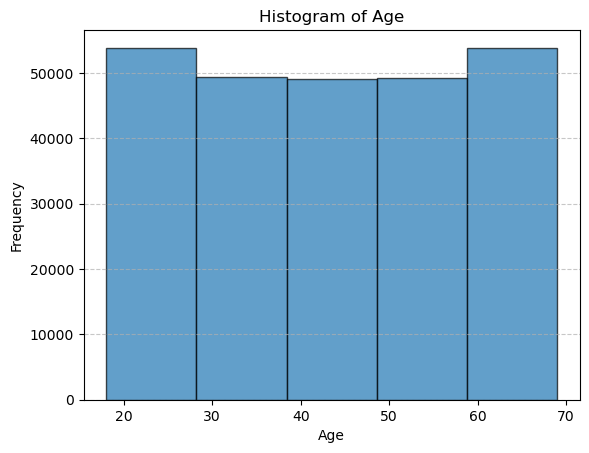

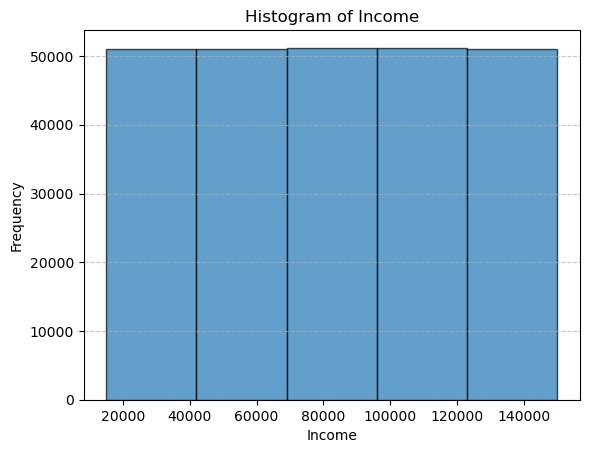

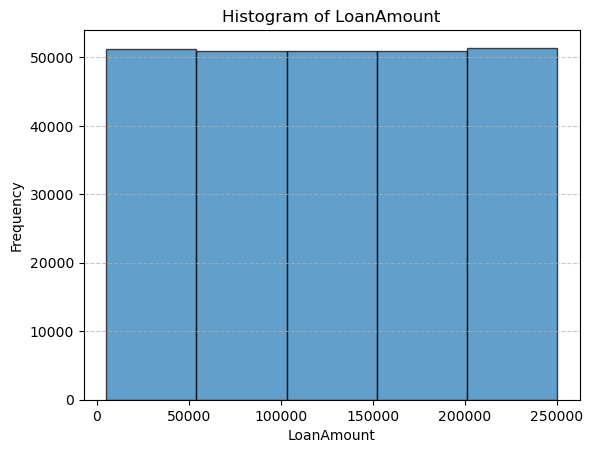

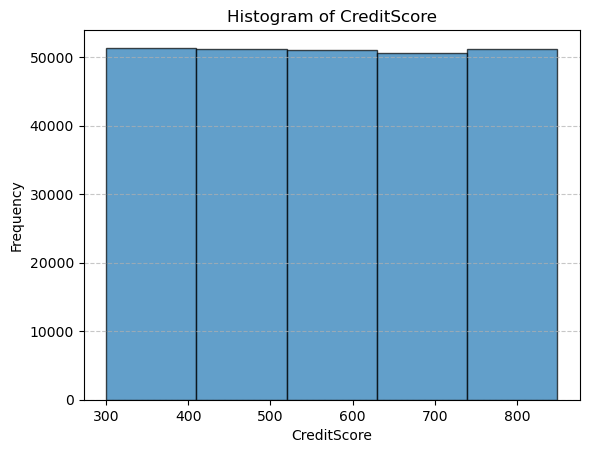

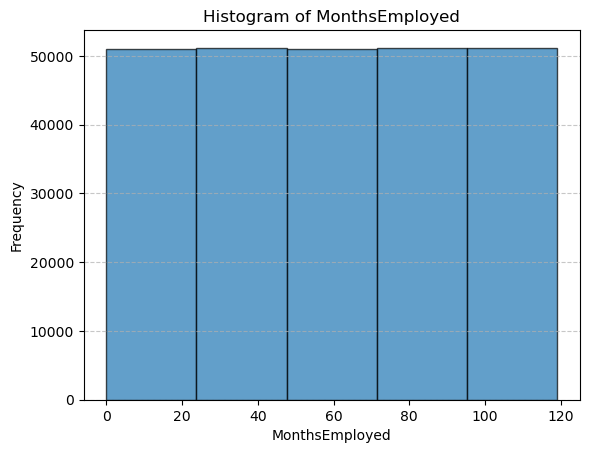

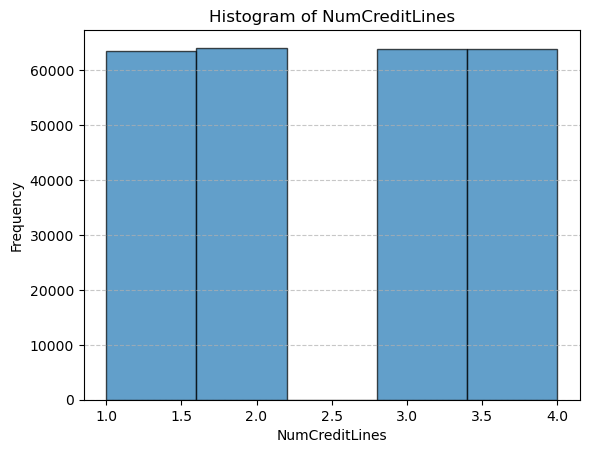

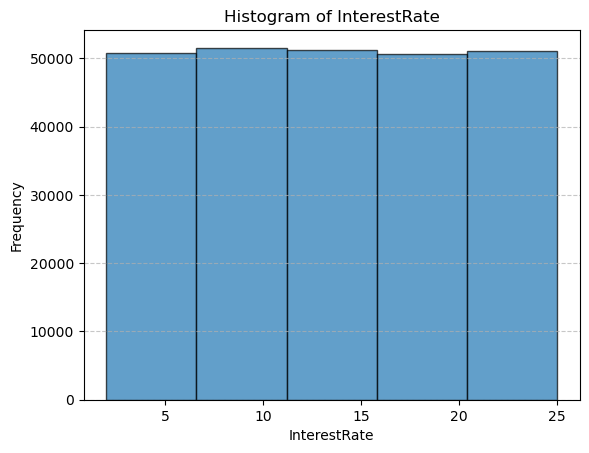

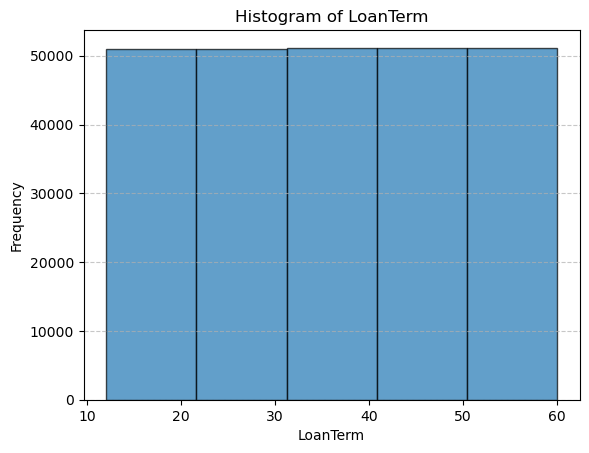

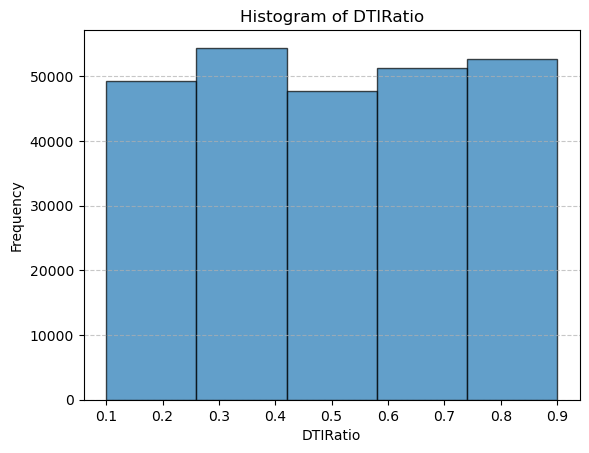

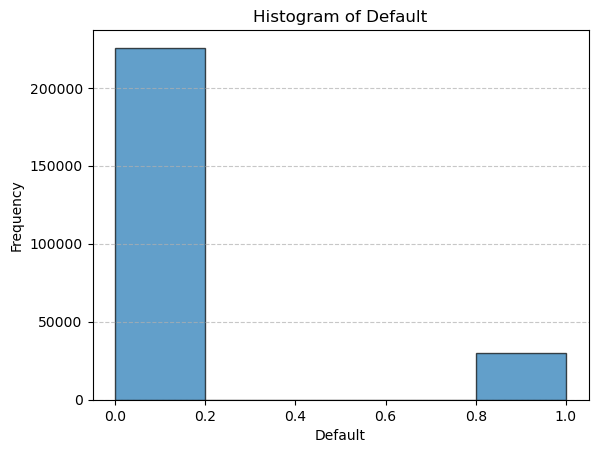

In [15]:
# Identifying numerical columns for histogram visualization
numerical_columns = loan_default_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Function to plot histograms with 4–5 bins
def plot_histograms_fixed_bins(dataframe, numerical_columns, bins=5):
    for col in numerical_columns:
        # Plot histogram with fixed bins
        plt.figure()
        plt.hist(dataframe[col], bins=bins, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Plot histograms with 4–5 bins for numerical columns
plot_histograms_fixed_bins(loan_default_df, numerical_columns, bins=5)

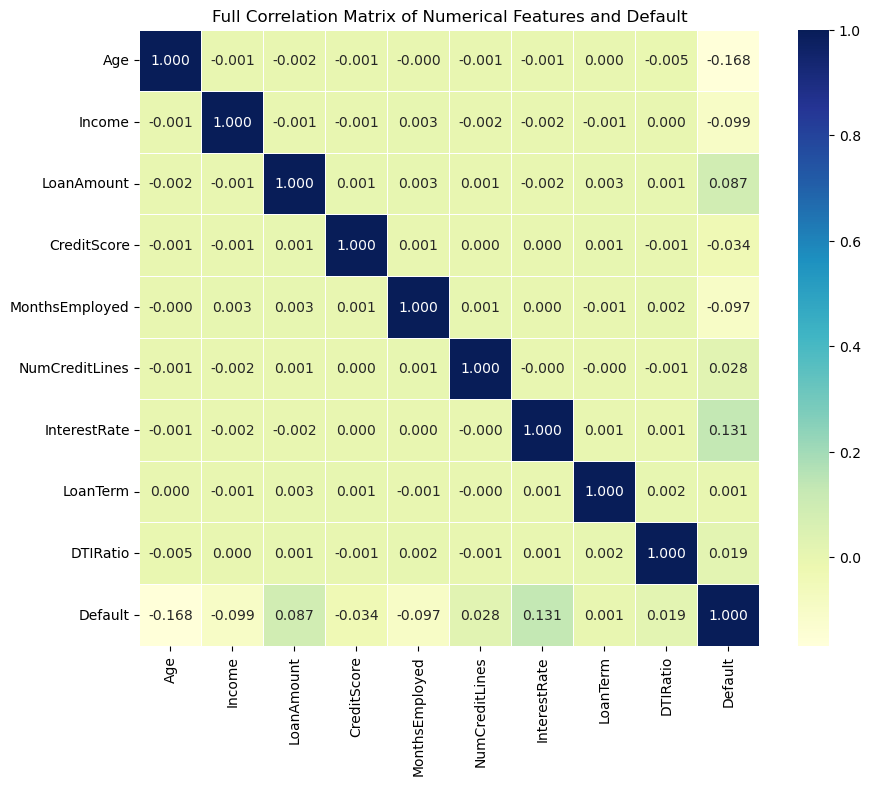

In [16]:
# Calculate the full correlation matrix for all numerical features including 'Default'
full_correlation_matrix = loan_default_df[numerical_columns].corr()

# Plot the full correlation matrix heatmap with a blue-green-yellow color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(
    full_correlation_matrix,
    annot=True,
    cmap='YlGnBu',  # Blue-Green-Yellow color palette
    fmt='.3f',
    linewidths=0.5,
    cbar=True
)
plt.title('Full Correlation Matrix of Numerical Features and Default')
plt.show()

# **Feature Engineering**

First potential feature combination: HasMortgage and HasDependents into a single feature called Financial_Obligations . This can provide a more holistic view of a borrower's financial responsibilities. this can help in discern whether a borrower might default on a loan:
1. Understanding Financial Burden:
Mortgage: If a borrower has a mortgage, they have a significant monthly obligation that affects their disposable income. This can impact their ability to repay additional loans.
Dependents: Having dependents often means additional expenses (e.g., childcare, education, healthcare), which can strain a borrower's budget. More dependents can indicate higher financial responsibility.
By combining these two features, we can create a single metric that reflects the overall financial burden on the borrower. A borrower with both a mortgage and dependents may be under more financial pressure than someone with just one or neither.
2. Creating a Categorical Understanding:
The combined feature can be categorized into levels of financial obligation, such as:
No Financial Obligations: Neither mortgage nor dependents.
Low Financial Obligations: Has either a mortgage or dependents.
High Financial Obligations: Has both a mortgage and dependents.
This categorization can help the model understand different risk levels associated with borrowers. For example, borrowers with high financial obligations may be more likely to default due to competing financial demands.
3. Improving Model Interpretability:
By using a single feature instead of two separate ones, we can reduce the complexity of the model. This makes it easier to interpret the impact of financial obligations on loan default risk.
It helps in identifying patterns: For instance, if borrowers with high financial obligations consistently show a higher default rate, this can be a strong indicator for the model.
4. Feature Interaction:
The interaction between having a mortgage and dependents can be more predictive than considering them separately. For example, a borrower with a high mortgage and several dependents may be at a higher risk of default than someone with just a mortgage or just dependents.
This combined feature captures the interplay between different financial responsibilities, which can be crucial for predicting defaults.
Example of Implementation:
We can create the Financial_Obligations feature as follows:

df['Financial_Obligations'] = df['HasMortgage'].map({'Yes': 1, 'No': 0}) + df['HasDependents'].map({'Yes': 1, 'No': 0})

In this example:

If a borrower has both a mortgage and dependents, Financial_Obligations would equal 2.
If they have neither, it would equal 0.
If they have one of the two, it would equal 1.
Conclusion:
By combining HasMortgage and HasDependents into a single feature, we can provide our model with a clearer picture of a borrower's financial situation, which can enhance its ability to predict loan defaults. This approach may help capture the complexity of financial obligations in a more manageable way, ultimately leading to better predictions and insights.


In [17]:
#Add a new column called 'Financial_Obligations' to the dataframe
loan_default_df['Financial_Obligations'] = loan_default_df['HasMortgage'].map({'Yes': 1, 'No': 0}) + loan_default_df['HasDependents'].map({'Yes': 1, 'No': 0})

In [18]:
#>Look at the first 5 rows of the dataframe
loan_default_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Financial_Obligations
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,2
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,1


In [19]:
#Look at distribution of the new column 'Financial_Obligations'
loan_default_df['Financial_Obligations'].value_counts()

Financial_Obligations
1    127665
2     63877
0     63805
Name: count, dtype: int64

In [20]:
#Look at info about the dataset with the additional column
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanID                 255347 non-null  object 
 1   Age                    255347 non-null  int64  
 2   Income                 255347 non-null  int64  
 3   LoanAmount             255347 non-null  int64  
 4   CreditScore            255347 non-null  int64  
 5   MonthsEmployed         255347 non-null  int64  
 6   NumCreditLines         255347 non-null  int64  
 7   InterestRate           255347 non-null  float64
 8   LoanTerm               255347 non-null  int64  
 9   DTIRatio               255347 non-null  float64
 10  Education              255347 non-null  object 
 11  EmploymentType         255347 non-null  object 
 12  MaritalStatus          255347 non-null  object 
 13  HasMortgage            255347 non-null  object 
 14  HasDependents          255347 non-nu

Second potential engineered feature: The "loan amount to income ratio" is a useful feature in predicting loan performance. It may provide insight into a borrower's financial situation. This ratio helps to assess the borrower's ability to repay the loan relative to their income. Some benefits of including this feature in a model:
Predictive Power: This ratio can indicate potential risk. A higher ratio may suggest that a borrower is taking on more debt relative to their income, which could lead to higher default rates.
Financial Assessment: It provides a straightforward metric for lenders to evaluate a borrower's financial health. By comparing the loan amount to income, lenders can make more informed decisions.
Model Improvement: Including this feature can enhance the model's predictive performance, as it captures important information about the borrower's financial leverage that may not be evident from individual features alone.
There is a questyion as to whether Debt-to-Income (DTI) ratio and loan to income ratio are too similar, the two are related but distinct. DTI typically considers all debt obligations (including existing loans, credit card debt, etc.) relative to income, while the loan amount to income ratio focuses specifically on the loan amount in question relative to income.
Including both features could provide complementary information, but we should take care to avoid redundancy. If both ratios convey similar information, it might lead to multicollinearity, which can affect the model's performance. Therefore, it’s essential to analyze the correlation between these features and determine if both should be included or if one is sufficient.
In summary, while the loan amount to income ratio and DTI are related, they may serve different purposes, and thoughtful feature engineering can help improve model performance without being repetitive.

In [21]:
# Add secoind new column called 'LoanAmountToIncomeRatio' to the dataframe
loan_default_df['LoanAmountToIncomeRatio'] = loan_default_df['LoanAmount'] / loan_default_df['Income']

In [22]:
# Check distribution of the new column 'LoanAmountToIncomeRatio'
loan_default_df['LoanAmountToIncomeRatio'].value_counts()

LoanAmountToIncomeRatio
0.960981    2
0.716745    2
0.357143    2
2.185874    2
0.343808    2
           ..
1.182113    1
1.334170    1
1.658728    1
1.034081    1
0.824382    1
Name: count, Length: 255338, dtype: int64

In [23]:
# Look at info about dataset with the additional column
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanID                   255347 non-null  object 
 1   Age                      255347 non-null  int64  
 2   Income                   255347 non-null  int64  
 3   LoanAmount               255347 non-null  int64  
 4   CreditScore              255347 non-null  int64  
 5   MonthsEmployed           255347 non-null  int64  
 6   NumCreditLines           255347 non-null  int64  
 7   InterestRate             255347 non-null  float64
 8   LoanTerm                 255347 non-null  int64  
 9   DTIRatio                 255347 non-null  float64
 10  Education                255347 non-null  object 
 11  EmploymentType           255347 non-null  object 
 12  MaritalStatus            255347 non-null  object 
 13  HasMortgage              255347 non-null  object 
 14  HasD

In [24]:
# Add a third new column called 'TotalDebtToIncomeRatio' to the dataframe
loan_default_df['TotalDebtToIncomeRatio'] = loan_default_df['DTIRatio'] + loan_default_df['Financial_Obligations']

In [25]:
# Double check that there nno nuill values in the new column
loan_default_df['TotalDebtToIncomeRatio'].isnull().sum()

0

In [26]:
# Double check that there nno null values in the DTIRatio column
loan_default_df['DTIRatio'].isnull().sum()

0

In [27]:
#retrieve any rows where value is null from loan_default_df - should be no rows
loan_default_df[loan_default_df['TotalDebtToIncomeRatio'].isnull()]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Financial_Obligations,LoanAmountToIncomeRatio,TotalDebtToIncomeRatio


In [28]:
# Look at distribution of the new column 'TotalDebtToIncomeRatio'
loan_default_df['TotalDebtToIncomeRatio'].value_counts()

TotalDebtToIncomeRatio
1.67    1722
1.30    1676
1.32    1658
1.39    1653
1.64    1649
        ... 
2.35     693
0.90     432
2.10     411
2.90     399
0.10     375
Name: count, Length: 243, dtype: int64

In [29]:
# Look at info about dataset with the additional column
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanID                   255347 non-null  object 
 1   Age                      255347 non-null  int64  
 2   Income                   255347 non-null  int64  
 3   LoanAmount               255347 non-null  int64  
 4   CreditScore              255347 non-null  int64  
 5   MonthsEmployed           255347 non-null  int64  
 6   NumCreditLines           255347 non-null  int64  
 7   InterestRate             255347 non-null  float64
 8   LoanTerm                 255347 non-null  int64  
 9   DTIRatio                 255347 non-null  float64
 10  Education                255347 non-null  object 
 11  EmploymentType           255347 non-null  object 
 12  MaritalStatus            255347 non-null  object 
 13  HasMortgage              255347 non-null  object 
 14  HasD

**Note:  We added three aditional columns as part of fearure engineering.  After re-running our models, we did not see any improvement in any of the metrics from any of the different models we ran.**

---



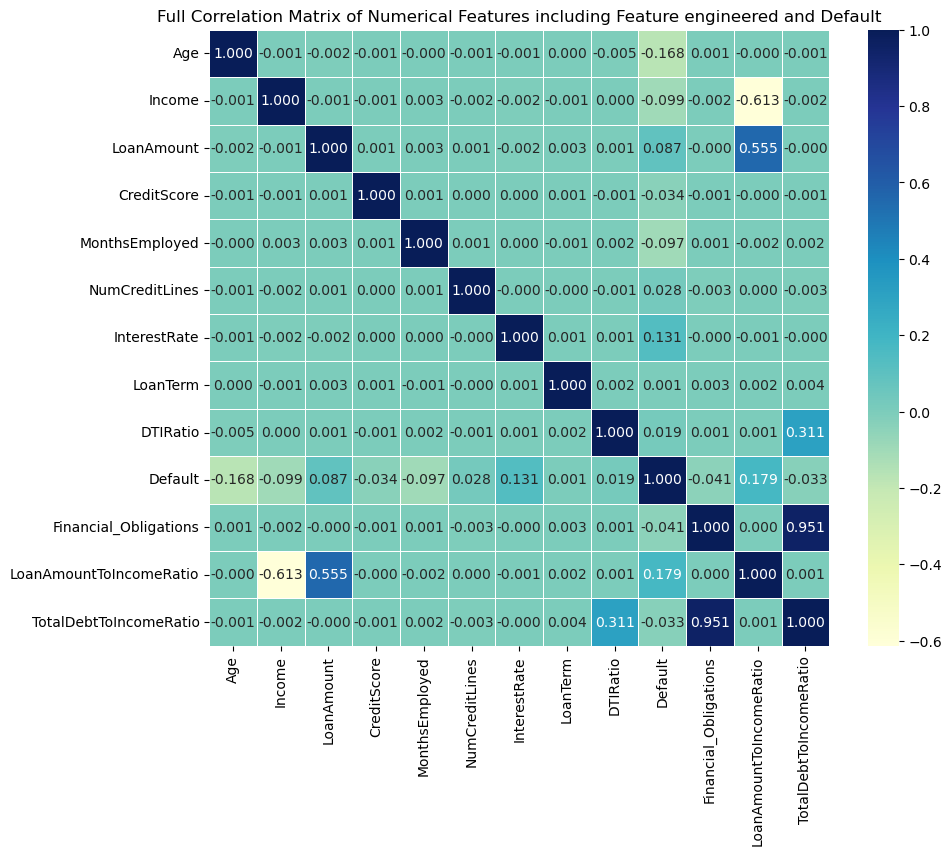

In [30]:
# Identifying numerical columns for histogram visualization
numerical_columns = loan_default_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the full correlation matrix for all numerical features including 'Default'
full_correlation_matrix = loan_default_df[numerical_columns].corr()

# Plot the full correlation matrix heatmap with a blue-green-yellow color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(
    full_correlation_matrix,
    annot=True,
    cmap='YlGnBu',  # Blue-Green-Yellow color palette
    fmt='.3f',
    linewidths=0.5,
    cbar=True
)
plt.title('Full Correlation Matrix of Numerical Features including Feature engineered and Default')
plt.show()

In [31]:
#drop the Loan ID column
loan_default_df.drop(['LoanID'], axis=1, inplace=True)

#look at the first 5 rows of the dataframe
loan_default_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Financial_Obligations,LoanAmountToIncomeRatio,TotalDebtToIncomeRatio
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,2,0.588262,2.44
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,0,2.467481,0.68
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,2,1.534154,2.31
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,0,1.412638,0.23
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,1,0.447179,1.73


In [32]:
# Split training and testing sets
# Create the features DataFrame, X
X = loan_default_df.copy()
X = X.drop(columns='Default')

# Create the target DataFrame, y
y = loan_default_df['Default']

# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Review the X_train DataFrame
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Financial_Obligations,LoanAmountToIncomeRatio,TotalDebtToIncomeRatio
120619,63,15059,70015,739,87,3,18.43,48,0.62,PhD,Part-time,Single,No,Yes,Business,Yes,1,4.649379,1.62
86171,54,113722,162395,805,22,3,17.31,12,0.33,PhD,Unemployed,Single,No,Yes,Business,No,1,1.428000,1.33
10433,37,63953,19166,637,56,1,20.42,12,0.50,PhD,Unemployed,Divorced,Yes,No,Other,No,1,0.299689,1.50
121331,24,75686,27350,547,24,3,22.99,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,No,2,0.361361,2.29
14129,45,24160,144568,446,73,2,20.10,12,0.26,Bachelor's,Self-employed,Single,No,Yes,Education,No,1,5.983775,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0,1.386287,0.87
103694,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0,3.009927,0.11
131932,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,1,1.735279,1.24
146867,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,1,1.356839,1.30


In [34]:
#Review the Y_train DataFrame
y_train

120619    0
86171     0
10433     0
121331    0
14129     0
         ..
119879    0
103694    0
131932    0
146867    0
121958    1
Name: Default, Length: 191510, dtype: int64

# **Standard Scaling and Encoding**

In [35]:
# This is ordinal! Lets use the ordinal encoder
# We'll set any unknown values to -1
encode_education = OrdinalEncoder(categories=[["High School", "Bachelor's", "Master's", "PhD"]], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_education.fit(X_train['Education'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", 'PhD']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [36]:
# Encoder for EmploymentType
encode_employment_type = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_employment_type.fit(X_train['EmploymentType'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [37]:
# Encoder for MaritalStatus
encode_marital_status = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_marital_status.fit(X_train['MaritalStatus'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [38]:
# Encoder for HasMortgage
encode_has_mortgage = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_has_mortgage.fit(X_train['HasMortgage'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [39]:
# Encoder for HasDependents
encode_has_dependents = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_has_dependents.fit(X_train['HasDependents'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [40]:
# Encoder for LoanPurpose
encode_loan_purpose = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_loan_purpose.fit(X_train['LoanPurpose'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [41]:
# Encoder for CoSigner
encode_has_cosigner = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_has_cosigner.fit(X_train['HasCoSigner'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [42]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index(drop=True)

    # Multicolumn encoders first
    employment_type_feature_names = encode_employment_type.get_feature_names_out(['EmploymentType'])  # Pass the original column name to get_feature_names_out
    employment_type_encoded_df = pd.DataFrame(encode_employment_type.transform(X_data['EmploymentType'].values.reshape(-1, 1)), columns=employment_type_feature_names)

    marital_status_feature_names = encode_marital_status.get_feature_names_out(['MaritalStatus'])  # Pass the original column name to get_feature_names_out
    marital_status_encoded_df = pd.DataFrame(encode_marital_status.transform(X_data['MaritalStatus'].values.reshape(-1, 1)), columns=marital_status_feature_names)

    has_mortgage_feature_names = encode_has_mortgage.get_feature_names_out(['HasMortgage'])  # Pass the original column name to get_feature_names_out
    has_mortgage_encoded_df = pd.DataFrame(encode_has_mortgage.transform(X_data['HasMortgage'].values.reshape(-1, 1)), columns=has_mortgage_feature_names)

    has_dependents_feature_names = encode_has_dependents.get_feature_names_out(['HasDependents'])
    has_dependents_encoded_df = pd.DataFrame(encode_has_dependents.transform(X_data['HasDependents'].values.reshape(-1, 1)), columns=has_dependents_feature_names)

    loan_purpose_feature_names = encode_loan_purpose.get_feature_names_out(['LoanPurpose'])
    loan_purpose_encoded_df = pd.DataFrame(encode_loan_purpose.transform(X_data['LoanPurpose'].values.reshape(-1, 1)), columns=loan_purpose_feature_names)

    has_cosigner_feature_names = encode_has_cosigner.get_feature_names_out(['HasCoSigner'])
    encode_has_cosigner_df = pd.DataFrame(encode_has_cosigner.transform(X_data['HasCoSigner'].values.reshape(-1, 1)), columns=has_cosigner_feature_names)

    # Concat all dfs together
    dfs = [X_data_numeric, employment_type_encoded_df, marital_status_encoded_df, has_mortgage_encoded_df, has_dependents_encoded_df, loan_purpose_encoded_df, encode_has_cosigner_df ]
    X_data_encoded = pd.concat(dfs, axis=1)

    # Add single column encoders
    X_data_encoded['Education'] = encode_education.transform(X_data['Education'].values.reshape(-1, 1))

    return X_data_encoded

In [43]:
# Apply the encoding function to both training and testing
X_train_encoded = encode_categorical(X_train)
X_test_encoded = encode_categorical(X_test)

In [44]:
# Look at X_train data
X_train_encoded

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Financial_Obligations,...,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Education
0,63,15059,70015,739,87,3,18.43,48,0.62,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
1,54,113722,162395,805,22,3,17.31,12,0.33,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
2,37,63953,19166,637,56,1,20.42,12,0.50,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,24,75686,27350,547,24,3,22.99,12,0.29,2,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,45,24160,144568,446,73,2,20.10,12,0.26,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191505,40,116623,161673,651,79,2,23.44,12,0.87,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
191506,67,62958,189499,460,77,3,9.29,36,0.11,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
191507,62,34372,59645,524,94,3,9.72,60,0.24,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
191508,44,146262,198454,489,7,4,4.31,48,0.30,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
#List of numerical columns for scaling
numerical_columns_for_scaling = ['Age',	'Income',	'LoanAmount',	'CreditScore',	'MonthsEmployed',	'NumCreditLines',	'InterestRate',	'LoanTerm',	'DTIRatio', 'Financial_Obligations', 'LoanAmountToIncomeRatio', 'TotalDebtToIncomeRatio']

#Instantiate the StandardScaler
scaler = StandardScaler()

#Fit the scaler to the training data
X_train_encoded[numerical_columns_for_scaling] = scaler.fit_transform(X_train_encoded[numerical_columns_for_scaling])

#Display the enocded data
X_train_encoded


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Financial_Obligations,...,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Education
0,1.301608,-1.731092,-0.812414,1.038278,0.793405,0.445539,0.744737,0.707524,0.516287,-0.000118,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
1,0.701131,0.801135,0.491486,1.453502,-1.082642,0.445539,0.575991,-1.417690,-0.739755,-0.000118,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
2,-0.433104,-0.476207,-1.530123,0.396567,-0.101325,-1.344995,1.044564,-1.417690,-0.003455,-0.000118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,-1.300459,-0.175075,-1.414610,-0.169649,-1.024917,0.445539,1.431778,-1.417690,-0.913002,1.413734,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,0.100654,-1.497512,0.239866,-0.805068,0.389334,-0.449728,0.996351,-1.417690,-1.042937,-0.000118,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191505,-0.232945,0.875590,0.481295,0.484645,0.562507,-0.449728,1.499578,-1.417690,1.599081,-1.413970,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
191506,1.568486,-0.501745,0.874046,-0.716991,0.504783,0.445539,-0.632357,-0.000880,-1.692613,-1.413970,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
191507,1.234888,-1.235416,-0.958781,-0.314348,0.995441,0.445539,-0.567570,1.415929,-1.129560,-0.000118,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
191508,0.033934,1.636287,1.000441,-0.534543,-1.515576,1.340807,-1.382678,0.707524,-0.869690,-0.000118,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
# Transforming the test dataset based on the fit from the training dataset
X_test_encoded[numerical_columns_for_scaling] = scaler.transform(X_test_encoded[numerical_columns_for_scaling])

#Display the encoded data
X_test_encoded


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Financial_Obligations,...,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Education
0,0.767850,0.773775,-0.496559,0.044255,1.543824,-0.449728,1.514645,-0.000880,-1.519366,1.413734,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
1,0.834570,0.232569,0.056476,0.421732,-0.159049,-1.344995,0.256577,-1.417690,-0.306637,1.413734,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.167020,-0.111348,-0.736167,-0.031241,1.312926,0.445539,0.682964,-1.417690,-0.913002,1.413734,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
3,-1.167020,-0.499820,-1.648148,-1.560023,1.688135,-1.344995,0.184257,-0.709285,-0.393260,-1.413970,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.300459,-1.356223,-1.501668,0.553849,1.226339,0.445539,0.230964,1.415929,0.819469,-0.000118,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63832,-0.299664,0.144254,-1.379860,-0.962351,-0.505397,-1.344995,0.833631,-0.000880,0.256416,-0.000118,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
63833,1.501767,1.519766,-0.879796,-0.509378,-0.187912,-1.344995,1.443831,-1.417690,-0.869690,-0.000118,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
63834,-0.433104,-1.319060,0.111029,-1.459362,-1.659887,0.445539,-1.458011,-0.709285,0.819469,-0.000118,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
63835,1.101449,-0.861112,-1.324813,-0.094153,-1.515576,0.445539,0.178230,-1.417690,-1.086249,-0.000118,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


In [47]:
#Double checking there are no null values
X_test_encoded['TotalDebtToIncomeRatio'].isnull().sum()

0

In [48]:
# Check columns in the encoded training set
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191510 entries, 0 to 191509
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           191510 non-null  float64
 1   Income                        191510 non-null  float64
 2   LoanAmount                    191510 non-null  float64
 3   CreditScore                   191510 non-null  float64
 4   MonthsEmployed                191510 non-null  float64
 5   NumCreditLines                191510 non-null  float64
 6   InterestRate                  191510 non-null  float64
 7   LoanTerm                      191510 non-null  float64
 8   DTIRatio                      191510 non-null  float64
 9   Financial_Obligations         191510 non-null  float64
 10  LoanAmountToIncomeRatio       191510 non-null  float64
 11  TotalDebtToIncomeRatio        191510 non-null  float64
 12  EmploymentType_Part-time      191510 non-nul

In [49]:
# Check columns in the test encoded training set
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63837 entries, 0 to 63836
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           63837 non-null  float64
 1   Income                        63837 non-null  float64
 2   LoanAmount                    63837 non-null  float64
 3   CreditScore                   63837 non-null  float64
 4   MonthsEmployed                63837 non-null  float64
 5   NumCreditLines                63837 non-null  float64
 6   InterestRate                  63837 non-null  float64
 7   LoanTerm                      63837 non-null  float64
 8   DTIRatio                      63837 non-null  float64
 9   Financial_Obligations         63837 non-null  float64
 10  LoanAmountToIncomeRatio       63837 non-null  float64
 11  TotalDebtToIncomeRatio        63837 non-null  float64
 12  EmploymentType_Part-time      63837 non-null  float64
 13  E

**Common Functions**

In [50]:
# Function to display the confusion matrix
def display_confusion_matrix(y_test, y_pred, title):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #how to interpret classification matrix
    tn, fp, fn, tp = cm.ravel()

    data = {'Metric': ['True Negatives', 'False Positives', 'False Negatives', 'True Positives'],
          'Count': [tn, fp, fn, tp]}

    df = pd.DataFrame(data)
    display(df)  # Display the DataFrame in Colab
    print("\n\n\n")

    # Create heatmaps for confusion matrices
    plt.figure(figsize=(16, 6))

    # Heatmap for the model trained on original data
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
    plt.title("Confusion Matrix (" + title +")")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

# Model and Fit the Data to a Logistic Regression

In [51]:
# Create a `LogisticRegression` function and assign it
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)

In [52]:
# Fit the model
lr_model = logistic_regression_model.fit(X_train_encoded, y_train)

In [53]:
# Validate the model
print(f"Training Data Score: {lr_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_encoded, y_test)}")

Training Data Score: 0.8864393504255652
Testing Data Score: 0.8871657502702195


In [54]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred = lr_model.predict(X_test_encoded)

# Review the predictions
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred)

0.8871657502702195

,Metric,Count
0,True Negatives,56103
1,False Positives,307
2,False Negatives,6896
3,True Positives,531


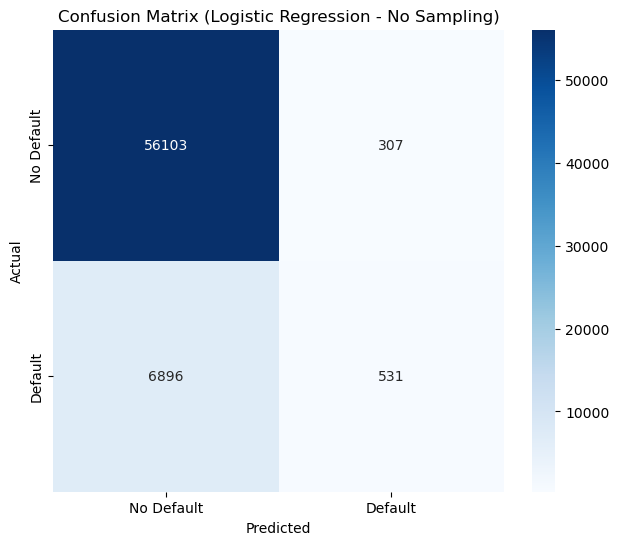

In [222]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred, "Logistic Regression - No Sampling")

In [57]:
#Show classification report
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837



**Key Findings - Logistic Regression - No Sampling**

The accuracy score for logistic regression without any sampling is about 89%.  This seems impressive at first glance.  However, the precision and recall for class 1 are 63% and 7% respectively.  The F1 score on the 1 class is only 13%, which is very poor.

This model would be very bad for a bank due to the poor recall metric.  Recall is the key metric in this use case as a low recall would mean the bank giving out many loans which will default.

The dataset is imbalanced.  The majority of the DataSet is for "No Defaults" far outweighing the number of "Defaults".

Let's try and increase the recall by trying different techniques to handle the unbalanced dataset.


**UnderSampling**

In [58]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [59]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train_encoded, y_train)

In [60]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

Default
0    22226
1    22226
Name: count, dtype: int64

In [61]:
logistic_regression_model_undersampled = LogisticRegression(random_state=42, max_iter=1000)

In [62]:
lr_model_undersampled = logistic_regression_model_undersampled.fit(X_undersampled, y_undersampled)

In [63]:
# Predict labels for oversampled testing features
y_pred_undersampled = lr_model_undersampled.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39102
1,False Positives,17308
2,False Negatives,2325
3,True Positives,5102


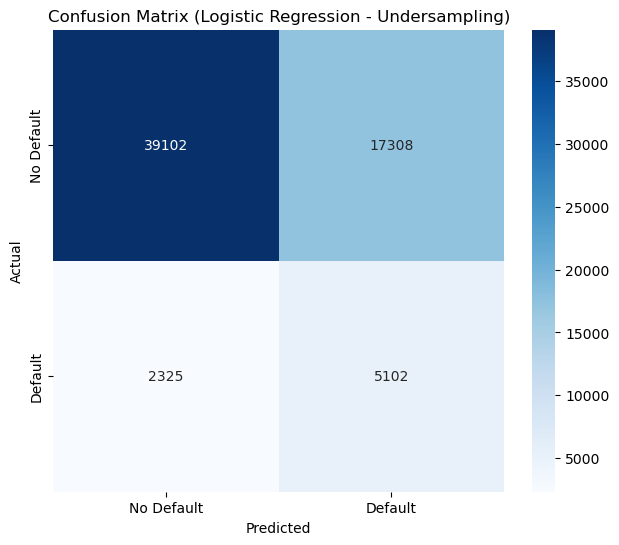

In [223]:
#confusion matrix with logistic regression and undersamping
display_confusion_matrix(y_test, y_pred_undersampled, "Logistic Regression - Undersampling")

In [65]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - Undersampling")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837



**Key Findings - Logistic Regression - UnderSampling**

The accuracy score for logistic regression using undersampling is about 69%.  The precision and recall for class 1 are 23% and 69% respectively.  The F1 score on the 1 class is 34%, which is not good.

The impact of UnderSampling compared to No Sampling is that the overall accuracy has gone down from 89% to 69%, the precision on the 1 class has gone down from 63% to 23% and the recall on the 1 class has increased from 7% to 69%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model with UnderSamping may be better for the Loan Default use case given that the recall is more significant than the precision.

In [66]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [67]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train_encoded, y_train)

In [68]:
# Count distinct values
y_oversampled.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [69]:
logistic_regression_model_oversampled = LogisticRegression(random_state=42, max_iter=1000)

In [70]:
lr_model_oversampled = logistic_regression_model_oversampled.fit(X_oversampled, y_oversampled)

In [71]:
# Predict labels for oversampled testing features
y_pred_oversampled = lr_model_oversampled.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39075
1,False Positives,17335
2,False Negatives,2310
3,True Positives,5117


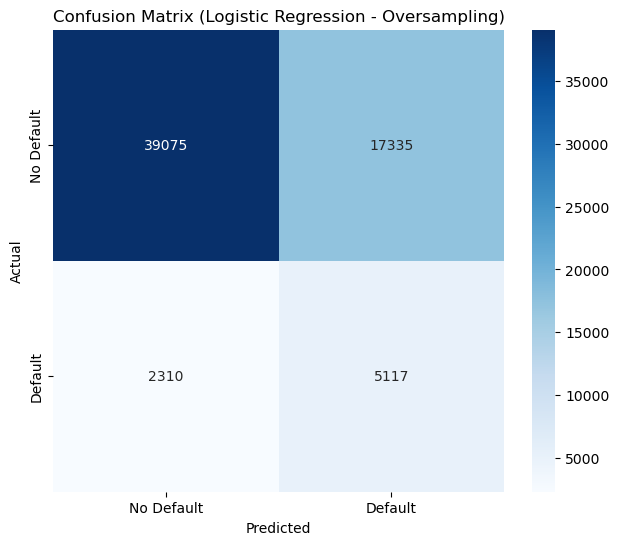

In [224]:
#confusion matrix with logistic regression and undersamping
display_confusion_matrix(y_test, y_pred_oversampled, "Logistic Regression - Oversampling")

In [233]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - Undersampling Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Logistic Regression - Oversampling Data")
print(classification_report(y_test, y_pred_oversampled))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression - Undersampling Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Logistic Regression - Oversampling Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0

**Key Findings - Logistic Regression - OverSampling**

It appears that the results of OverSampling are identical in the classification matrix to the results from UnderSampling.  However, when looking at the confusion matrix for OverSampling and UnderSampling, you can see that UnderSampling is slightly better.

The accuracy score for logistic regression using oversampling is about 69%.  The precision and recall for class 1 are 23% and 69% respectively.  The F1 score on the 1 class is 34%, which is not good.

The impact of OverSampling compared to No Sampling is that the overall accuracy has gone down from 89% to 69%, the precision on the 1 class has gone down from 63% to 23% and the recall on the 1 class has increased from 7% to 69%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

In [74]:
# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [75]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_encoded, y_train)

In [76]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [77]:
smote_lr_model = LogisticRegression(random_state=42, max_iter=2000)

In [78]:
# Fit the resampled data to the new model
smote_lr_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=2000, random_state=42)

In [79]:
# Predict labels for resampled testing features
smote_y_pred = smote_lr_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39206
1,False Positives,17204
2,False Negatives,2343
3,True Positives,5084


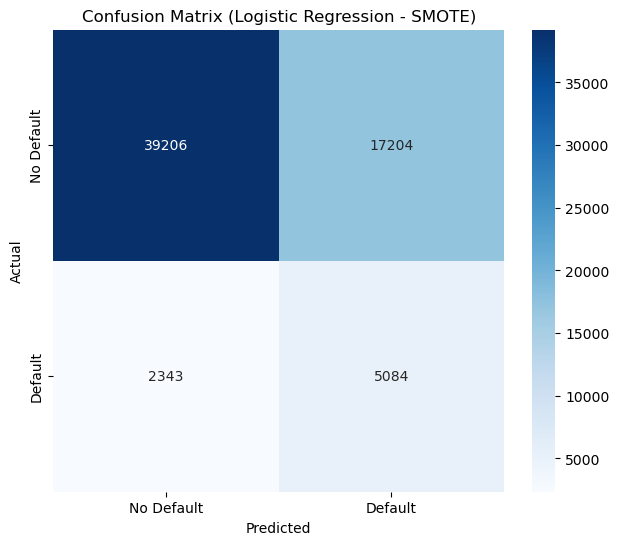

In [225]:
#confusion matrix with logistic regression and SMOTE
display_confusion_matrix(y_test, smote_y_pred, "Logistic Regression - SMOTE")

In [81]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression -Undersampled Data")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Logistic Regression - Oversampled Data")
print(classification_report(y_test, y_pred_oversampled))
print("---------")
print(f"Classification Report - Logistic Regression - SMOTE")
print(classification_report(y_test, smote_y_pred))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression -Undersampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Logistic Regression - Oversampled Data
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69

**Key Findings - Logistic Regression - SMOTE**

The accuracy score for logistic regression using SMOTE is about 69%.  The precision and recall for class 1 are 23% and 68% respectively.  The F1 score on the 1 class is 34%, which is not good.  This is only marginally worse than OverSampling or UnderSampling with a drop on the recall on the 1 class from 69% to 68% with SMOTE.

The impact of SMOTE compared to No Sampling is that the overall accuracy has gone down from 89% to 69%, the precision on the 1 class has gone down from 63% to 23% and the recall on the 1 class has increased from 7% to 68%.

Although the overall acuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

In [82]:
# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

In [83]:
# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_encoded, y_train)

In [84]:
y_resampled.value_counts()

Default
1    168736
0     91546
Name: count, dtype: int64

In [85]:
smoteenn_lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [86]:
# Fit the resampled data to the new model
smoteenn_lr_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [87]:
# Predict labels for resampled testing features
smoteenn_y_pred = smote_lr_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39206
1,False Positives,17204
2,False Negatives,2343
3,True Positives,5084


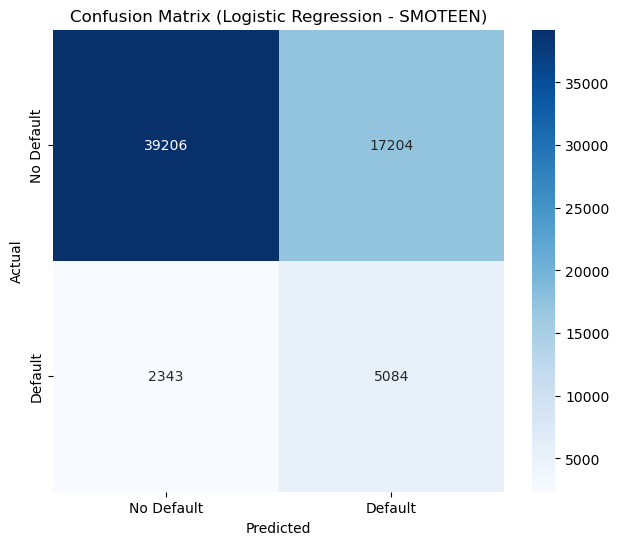

In [88]:
#create confusion matrix
display_confusion_matrix(y_test, smoteenn_y_pred, "Logistic Regression - SMOTEEN")

In [221]:
# Print classification reports
print(f"Classification Report - Logistic Regression - No Sampling")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - Undersampling")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - Logistic Regression - Oversampling")
print(classification_report(y_test, y_pred_oversampled))
print("---------")
print(f"Classification Report - Logistic Regression - SMOTE")
print(classification_report(y_test, smote_y_pred))
print("---------")
print(f"Classification Report - Logistic Regression - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

Classification Report - Logistic Regression - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Logistic Regression - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - Logistic Regression - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0

**Key Findings - Logistic Regression - SMOTEENN**

The accuracy score for logistic regression using SMOTEENN is about 69%.  The precision and recall for class 1 are 23% and 68% respectively.  The F1 score on the 1 class is 34%, which is not good.  This is only marginally worse than OverSampling or UnderSampling with a drop on the recall on the 1 class from 69% to 68% with SMOTE.

The SMOTE and SMOTEENN resampling methods seem to yield the same results.

The impact of SMOTEENN  compared to No Sampling is that the overall accuracy has gone down from 89% to 69%, the precision for the 1 class has gone down from 63% to 23% and the recall on the 1 class has increased from 7% to 68%.

Although the  accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

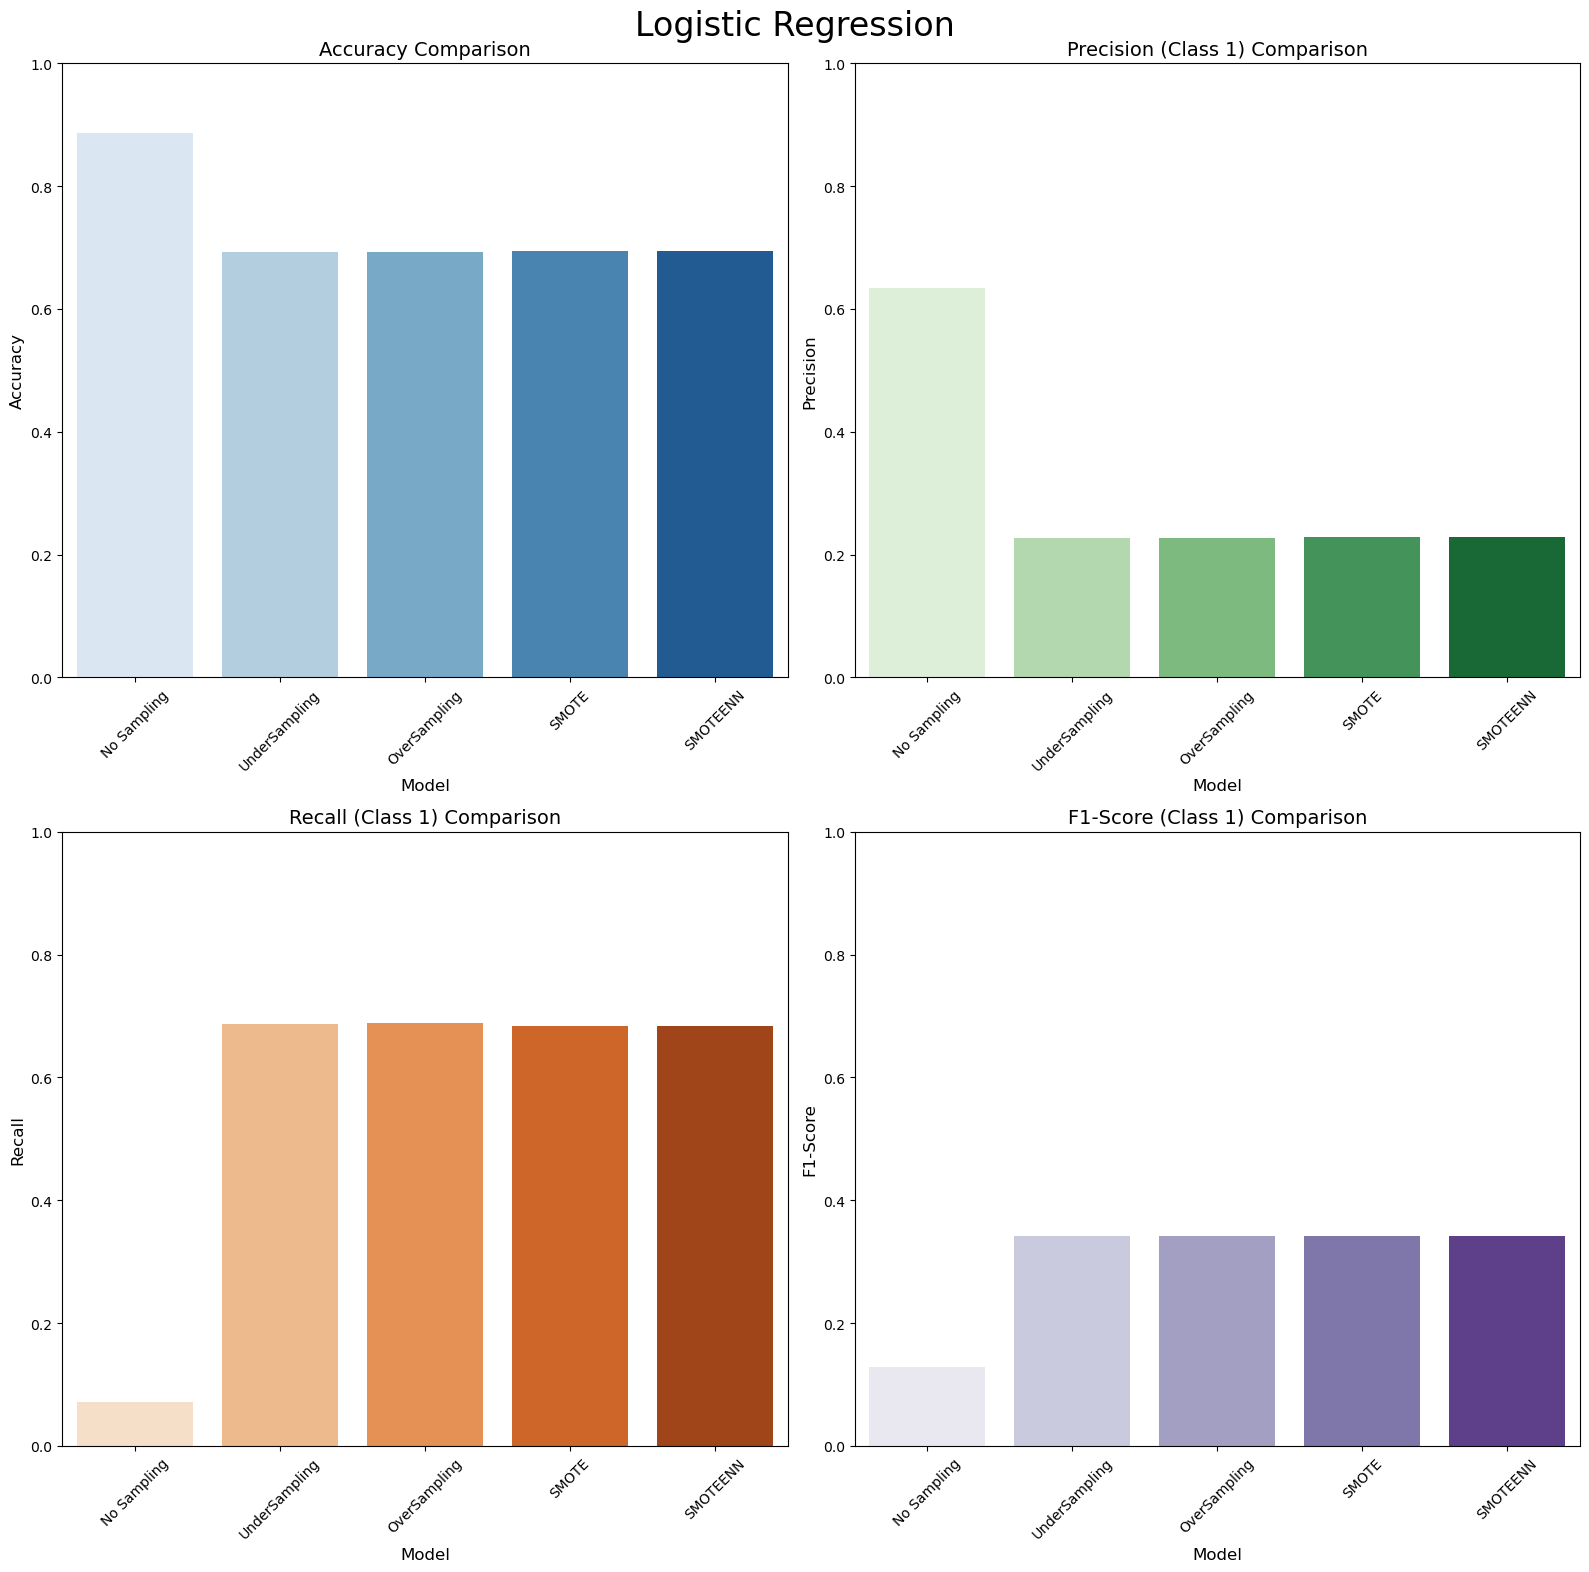

In [90]:
#Show Bar chart comparing metrics for Logistic Regression with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE", "SMOTEENN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_undersampled),
        accuracy_score(y_test, y_pred_oversampled),
        accuracy_score(y_test, smote_y_pred),
        accuracy_score(y_test, smoteenn_y_pred)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['precision'],
        classification_report(y_test, smote_y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, smoteenn_y_pred, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['recall'],
        classification_report(y_test, smote_y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, smoteenn_y_pred, output_dict=True)['1']['recall'],
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_oversampled, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smote_y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smoteenn_y_pred, output_dict=True)['1']['f1-score'],
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Logistic Regression', fontsize=24)  # Add overall title

# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()




**Visualizaton - Logistic Regression - Takeaways**

With logistic regression, the highest accuracy is with no sampling.  Out of the different sampling methods, OverSampling and UnderSampling achieve alomost the same results with a decrease in overall accuracy and precision on the 1 class but an increase in the recall and F1 score on the 1 class.  When comparing the confusion matrix for UnderSampling and OverSampling, the UnderSampling approach yields marginally better numbers than OverSampling although the numbers in the classification matrix for UnderSampling and OverSampling are the same.


# Model and Fit the Data to a RandomForestClassifier

In [91]:
#Model and fit to a Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)   #RandomForestClassifier(n_estimators=100)

In [92]:
rf_model = random_forest_model.fit(X_train_encoded, y_train)

In [93]:
# Validate the model
print(f"Training Data Score: {rf_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_encoded, y_test)}")

Training Data Score: 0.9999634483838964
Testing Data Score: 0.885834234064884


In [94]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_rf = rf_model.predict(X_test_encoded)

# Review the predictions
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_rf)

0.885834234064884

,Metric,Count
0,True Negatives,56185
1,False Positives,225
2,False Negatives,7063
3,True Positives,364


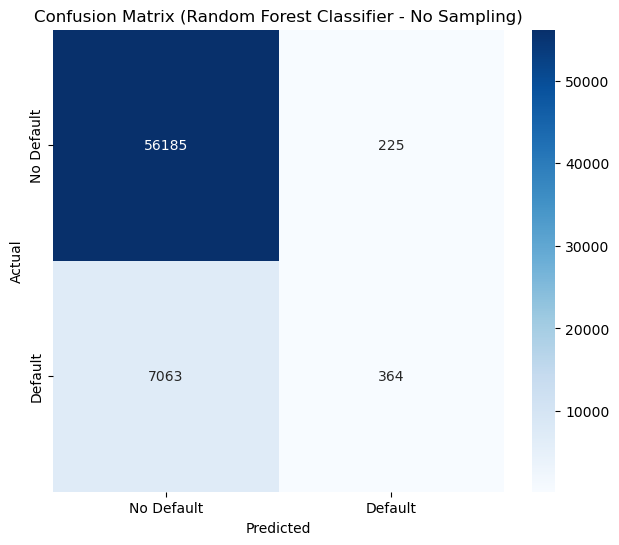

In [96]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_rf, "Random Forest Classifier - No Sampling")

In [97]:
#Show classification report
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837



**Key Findings - Random Forest Classifier - No Sampling**

The accuracy score for the Random Forest Classifier without any sampling is about 89%.  This seems impressive at first glance.  However, the precision and recall for class 1 are 62% and 5% respectively.  The  F1 score on the 1 class is only 9%, which is extremely poor.

This model would be very bad for a bank due to the poor recall metric.  Recall is the key metric in this use case as a low recall would mean the bank giving out many loans which will default.

The dataset is imbalanced.  The majority of the DataSet is for "No Defaults" far outweighing the number of "Defaults".

Let's try and increase the recall by trying different techniques to handle the unbalanced dataset.

**UnderSampler**

In [98]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [99]:
# Fit the training data to the random undersampler model
X_undersampled_us, y_undersampled_us = rus.fit_resample(X_train_encoded, y_train)

In [100]:
# Count distinct values for the resampled target data
y_undersampled_us.value_counts()

Default
0    22226
1    22226
Name: count, dtype: int64

In [101]:
undersample_rf_model = RandomForestClassifier(random_state=42)

In [102]:
undersample_rf_model.fit(X_undersampled_us, y_undersampled_us)

RandomForestClassifier(random_state=42)

In [103]:
# Predict labels for resampled testing features
undersample_y_pred_rf = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39076
1,False Positives,17334
2,False Negatives,2522
3,True Positives,4905


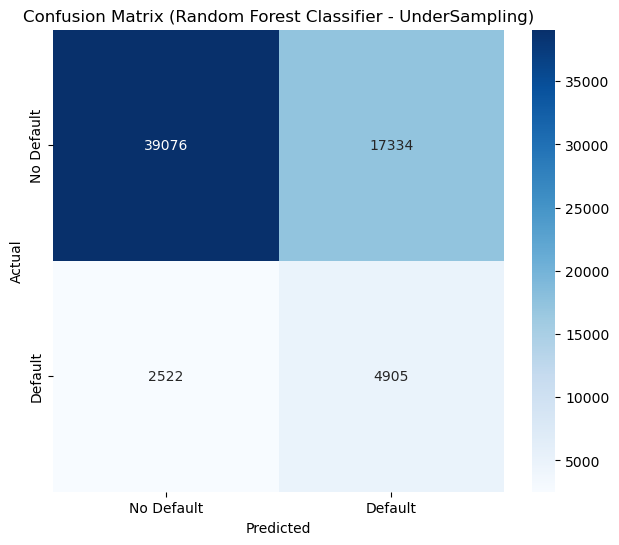

In [228]:
#classifcation matrix
display_confusion_matrix(y_test, undersample_y_pred_rf, "Random Forest Classifier - UnderSampling")

In [105]:
#Show classification report
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - RandomForest - Undersampling")
print(classification_report(y_test, undersample_y_pred_rf))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - RandomForest - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837



**Key Findings - Random Forest - UnderSampling**

The accuracy score for the random forest classifier using undersampling is about 69%.  The precision and recall for class 1 are 22% and 66% respectively.  The F1 score on the 1 class is 33%, which is not good.

The impact of UnderSampling compared to No Sampling is that the overall accuracy has gone down from 89% to 69%, the precision on the 1 class has gone down from 62% to 22% and the recall on the 1 class has increased from 5% to 66%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**OverSampler**

In [106]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [107]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled_os, y_oversampled_os = ros.fit_resample(X_train_encoded, y_train)

In [108]:
# Count distinct values
y_oversampled_os.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [109]:
oversample_rf_model = RandomForestClassifier(random_state=42)

In [110]:
oversample_rf_model.fit(X_oversampled_os, y_oversampled_os)

RandomForestClassifier(random_state=42)

In [111]:
# Predict labels for resampled testing features
oversample_y_pred_rf = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39076
1,False Positives,17334
2,False Negatives,2522
3,True Positives,4905


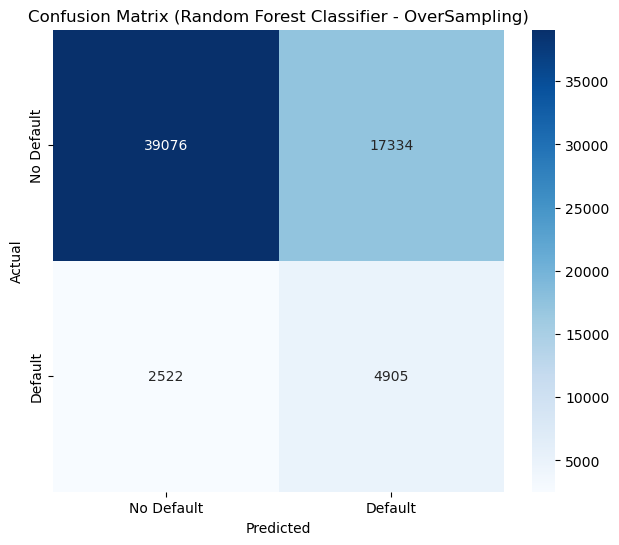

In [229]:
display_confusion_matrix(y_test, oversample_y_pred_rf, "Random Forest Classifier - OverSampling")

In [113]:
#Show classification reports
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - RandomForest - Undersampling")
print(classification_report(y_test, undersample_y_pred_rf))
print("---------")
print(f"Classification Report - RandomForest - Oversampling")
print(classification_report(y_test, oversample_y_pred_rf ))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - RandomForest - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - RandomForest - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    a

**Key Findings - Random Forest - OverSampling**

It appears that the results of OverSampling are identical to the results from UnderSampling.

The accuracy score for logistic regression using oversampling is about 69%.  The precision and recall for class 1 are 22% and 66% respectively.  The F1 score on the 1 class is 33%, which is not good.

The impact of OverSampling compared to No Sampling is that the overall accuracy has gone down from 89% to 69%, the precision on the 1 class has gone down from 62% to 22% and the recall on the 1 class has increased from 5% to 66%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**SMOTE**

In [114]:
# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [115]:
# Fit the training data to the smote_sampler model
X_resampled_rf, y_resampled_rf = smote_sampler.fit_resample(X_train_encoded, y_train)

In [116]:
# Count distinct values for the resampled target data
y_resampled_rf.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [117]:
smote_rf_model = RandomForestClassifier(random_state=42)

In [118]:
# Fit the resampled data to the new model
smote_rf_model.fit(X_resampled_rf, y_resampled_rf)

RandomForestClassifier(random_state=42)

In [119]:
# Predict labels for resampled testing features
smote_y_pred_rf = smote_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,55363
1,False Positives,1047
2,False Negatives,6564
3,True Positives,863


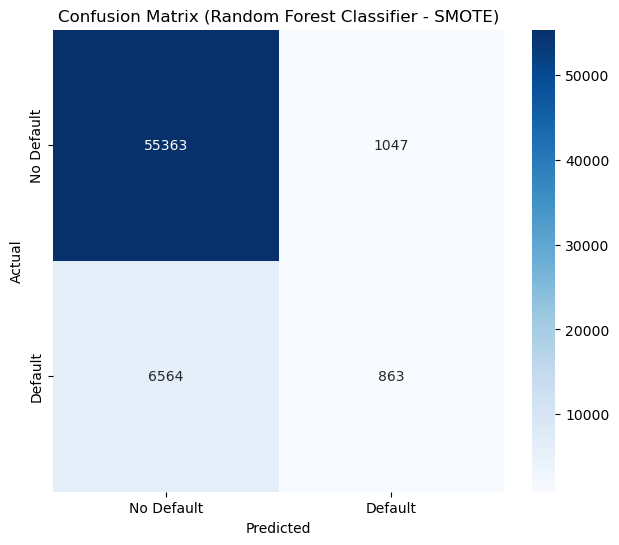

In [120]:
display_confusion_matrix(y_test, smote_y_pred_rf, "Random Forest Classifier - SMOTE")

In [121]:
#Show classification reports
print(f"Classification Report - Random Forest - No Sampling")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - Random Forest - Undersampling")
print(classification_report(y_test, undersample_y_pred_rf))
print("---------")
print(f"Classification Report - Random Forest - Oversampling")
print(classification_report(y_test, oversample_y_pred_rf ))
print("---------")
print(f"Classification Report - Random Forest - SMOTE")
print(classification_report(y_test, smote_y_pred_rf))

Classification Report - Random Forest - No Sampling
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - Random Forest - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - Random Forest - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

   

**Key Findings - Random Forest Classifier - SMOTE**

The accuracy score for randome forest classifier using SMOTE is about 88%.  The precision and recall for class 1 are 45% and 12% respectively.  The F1 score on the 1 class is 18%, which is poor.  

The impact of SMOTE compared to No Sampling is that the overall accuracy has gone down from 89% to 88% (just a 1% drop), the precision on the 1 class has gone down from 62% to 45% and the recall on the 1 class has increased from 5% to 12%.

The Random Forest Classifier with SMOTE seems to result in a high accuracy of 88%.  However, the recall on the 1 class is still too low for this model to be useful.

Although the overall accuracy has gone down slightly, the recall on the 1 class has improved slightly, thus this model is not particularly  better for the Loan Default use case given that the recall is more significant than the precision.  

**SMOTE Sampling does not work well with Random Forest**

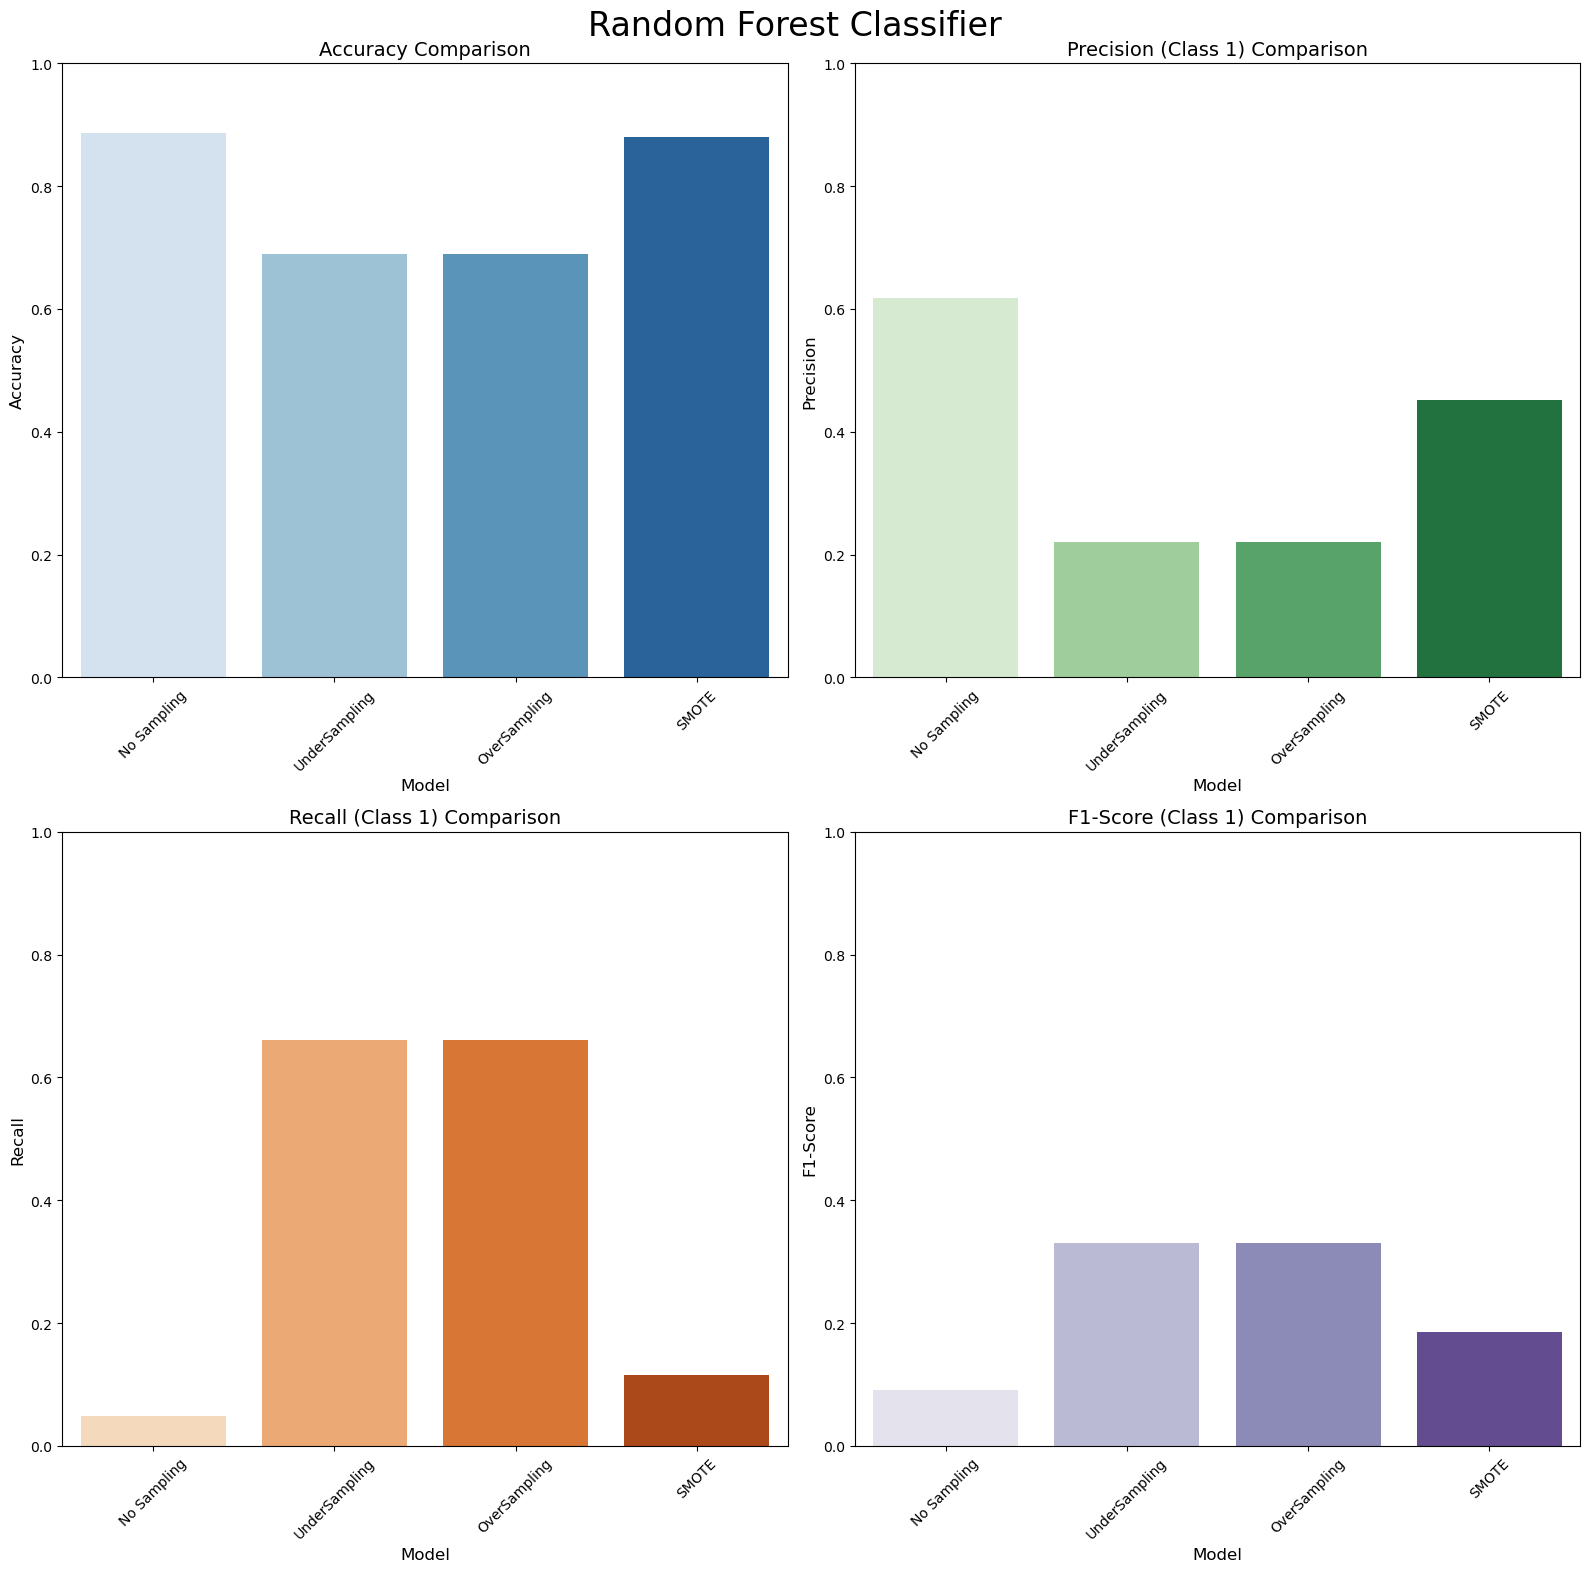

In [122]:
#Show Bar chart comparing metrics for Random Forest Classifier with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, undersample_y_pred_rf),
        accuracy_score(y_test, oversample_y_pred_rf),
        accuracy_score(y_test, smote_y_pred_rf)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, smote_y_pred_rf, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, smote_y_pred_rf, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smote_y_pred_rf, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Random Forest Classifier', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Visualizaton - Random Forest - Takeaways**

With Random Forest, the highest accuracy is with no sampling and the overall accuracy is just 1% lower with SMOTE.  However, the recall on class 1 with SMOTE is much lower than all other sampling approaches with Random Forest.  Therefore, the Random Forest classifier with SMOTE resampling is not good for this use case.

Out of the different sampling methods, OverSampling and UnderSampling achieve the same results with a decrease in overall accuracy and precision on the 1 class but an increase in the recall and F1 score on the 1 class.


**DecisionTreeClassifier**

In [123]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=42)

In [124]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_encoded, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8018077290599496


In [125]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_dt = dt_model.predict(X_test_encoded)

# Review the predictions
y_pred_dt

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [126]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_dt)

0.8018077290599496

,Metric,Count
0,True Negatives,49433
1,False Positives,6977
2,False Negatives,5675
3,True Positives,1752


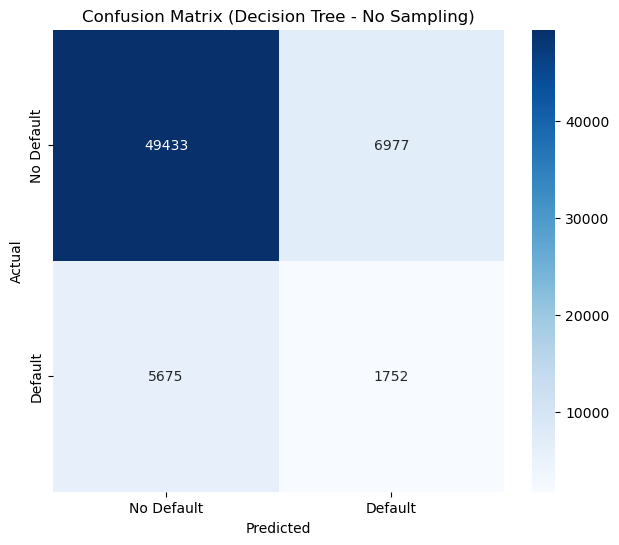

In [127]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_dt, "Decision Tree - No Sampling")

In [128]:
#Show classification report
print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))


Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.24      0.22      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.56      0.55     63837
weighted avg       0.82      0.80      0.81     63837



**Key Findings - Decision Tree - No Sampling**

The accuracy score for the Decision Tree without any sampling is about 80%.  This seems fairly good at first glance.  However, the precision and recall for class 1 are 20% and 24% respectively.  The  F1 score on the 1 class is only 22%, which is poor.

This model would be very bad for a bank due to the poor recall metric.  Recall is the key metric in this use case as a low recall would mean the bank giving out many loans which will default.

The dataset is imbalanced.  The majority of the DataSet is for "No Defaults" far outweighing the number of "Defaults".

Let's try and increase the recall by trying different techniques to handle the unbalanced dataset.

**Undersampling**

In [129]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [130]:
# Fit the training data to the random undersampler model
X_undersampled_us, y_undersampled_us = rus.fit_resample(X_train_encoded, y_train)

In [131]:
# Count distinct values for the resampled target data
y_undersampled_us.value_counts()

Default
0    22226
1    22226
Name: count, dtype: int64

In [132]:
undersample_dt_model = DecisionTreeClassifier(random_state=42)

In [133]:
undersample_dt_model.fit(X_undersampled_us, y_undersampled_us)

DecisionTreeClassifier(random_state=42)

In [134]:
# Predict labels for resampled testing features
undersample_y_pred_dt = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39076
1,False Positives,17334
2,False Negatives,2522
3,True Positives,4905


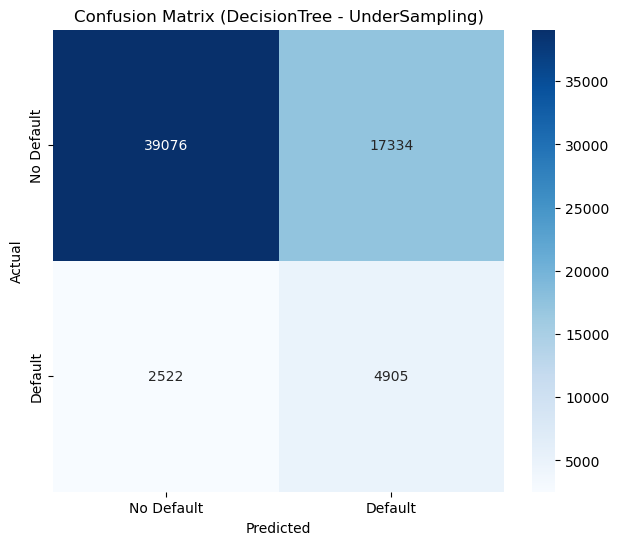

In [230]:
#classifcation matrix
display_confusion_matrix(y_test, undersample_y_pred_dt, "DecisionTree - UnderSampling")

In [231]:
#Show classification reports
print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - UnderSampling")
print(classification_report(y_test, undersample_y_pred_dt))

Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.24      0.22      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.56      0.55     63837
weighted avg       0.82      0.80      0.81     63837

---------
Classification Report - DecisionTree - UnderSampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837



**Key Findings - Decision Tree - UnderSampling**

The accuracy score for the decision tree classifier using undersampling is about 69%.  The precision and recall for class 1 are 22% and 66% respectively.  The F1 score on the 1 class is 33%, which is not good.

The impact of UnderSampling compared to No Sampling is that the overall accuracy has gone down from 80% to 69%, the precsion on the 1 class has gone up from 20% to 22% and the recall on the 1 class has increased from 24% to 66%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**Oversample**

In [137]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [138]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled_os, y_oversampled_os = ros.fit_resample(X_train_encoded, y_train)

In [139]:
# Count distinct values
y_oversampled_os.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [140]:
oversample_dt_model = DecisionTreeClassifier(random_state=42)

In [141]:
oversample_dt_model.fit(X_oversampled_os, y_oversampled_os)

DecisionTreeClassifier(random_state=42)

In [142]:
oversample_y_pred_dt = undersample_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,39076
1,False Positives,17334
2,False Negatives,2522
3,True Positives,4905


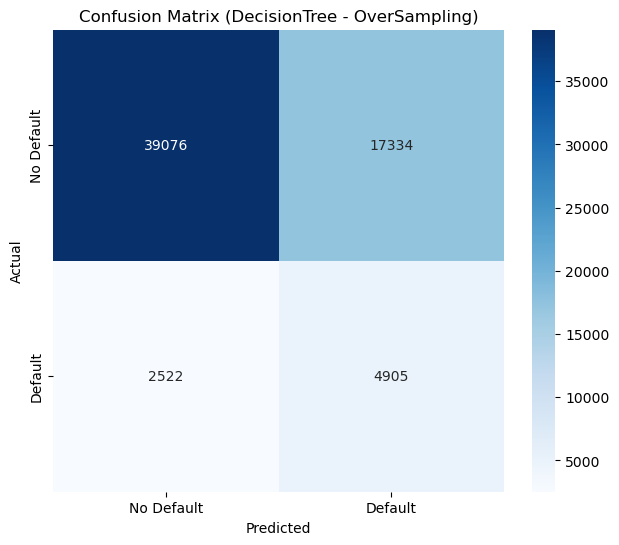

In [232]:
#classifcation matrix
display_confusion_matrix(y_test, oversample_y_pred_dt, "DecisionTree - OverSampling")

In [144]:
#Show classification Reports

print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Undersampling")
print(classification_report(y_test, undersample_y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Oversampling")
print(classification_report(y_test, oversample_y_pred_dt))


Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.24      0.22      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.56      0.55     63837
weighted avg       0.82      0.80      0.81     63837

---------
Classification Report - DecisionTree - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - DecisionTree - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    a

**Key Findings - Decision Tree - OverSampling**

It appears that the results of OverSampling are identical to the results from UnderSampling.

The accuracy score for decision tree using oversampling is about 69%.  The precision and recall for class 1 are 22% and 66% respectively.  The F1 score on the 1 class is 33%, which is not good.

The impact of OverSampling compared to No Sampling is that the overall accuracy has gone down from 80% to 69%, the precision on the 1 class has gone up from 20% to 22% and the recall on the 1 class has increased from 24% to 66%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**SMOTE**

In [145]:
# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [146]:
# Fit the training data to the smote_sampler model
X_resampled_rf, y_resampled_rf = smote_sampler.fit_resample(X_train_encoded, y_train)

In [147]:
# Count distinct values for the resampled target data
y_resampled_rf.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [148]:
smote_rf_model = DecisionTreeClassifier(random_state=42)

In [149]:
smote_rf_model.fit(X_resampled_rf, y_resampled_rf)

DecisionTreeClassifier(random_state=42)

In [150]:
smote_y_pred_dt = smote_rf_model.predict(X_test_encoded)

,Metric,Count
0,True Negatives,48046
1,False Positives,8364
2,False Negatives,5451
3,True Positives,1976


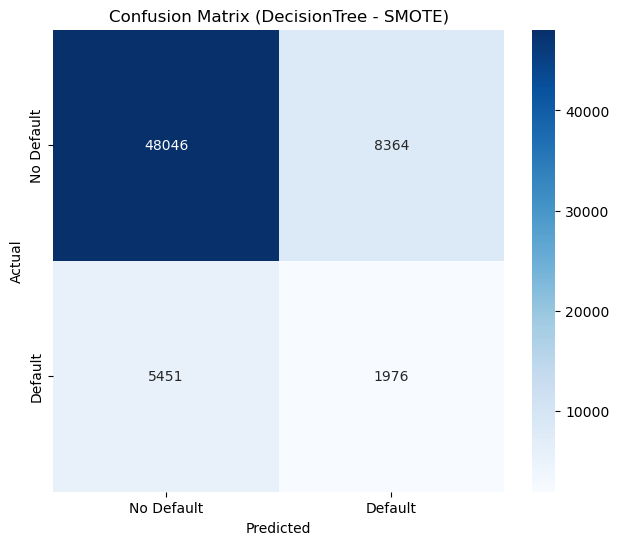

In [151]:
#classifcation matrix
display_confusion_matrix(y_test, smote_y_pred_dt, "DecisionTree - SMOTE")

In [152]:
#Show Classification Reports
print(f"Classification Report - Decision Tree - No Sampling")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Undersampling")
print(classification_report(y_test, undersample_y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - Oversampling")
print(classification_report(y_test, oversample_y_pred_dt))
print("---------")
print(f"Classification Report - DecisionTree - SMOTE")
print(classification_report(y_test, smote_y_pred_dt))

Classification Report - Decision Tree - No Sampling
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.24      0.22      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.56      0.55     63837
weighted avg       0.82      0.80      0.81     63837

---------
Classification Report - DecisionTree - Undersampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - DecisionTree - Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    a

**Key Findings - Decision Tree - SMOTE**

**Note:  SMOTE does not seem to work well with DecisionTree model**

The accuracy score for decision tree classifier using SMOTE is about 78%.  The precision and recall for class 1 are 19% and 27% respectively.  The F1 score on the 1 class is 22%, which is poor.  

The impact of SMOTE compared to No Sampling is that the overall accuracy has gone down from 80% to 78% (just a 2% drop), the precision on the 1 class has gone down from 20% to 19% and the recall on the 1 class has increased from 24% to 27%.

Although the overall accuracy has gone down slightly, the recall on the 1 class has improved only slightly, thus this model is not particularly better for the Loan Default use case given that the recall is more significant than the precision.  


**Note:  SMOTE does not seem to work well with DecisionTree model**

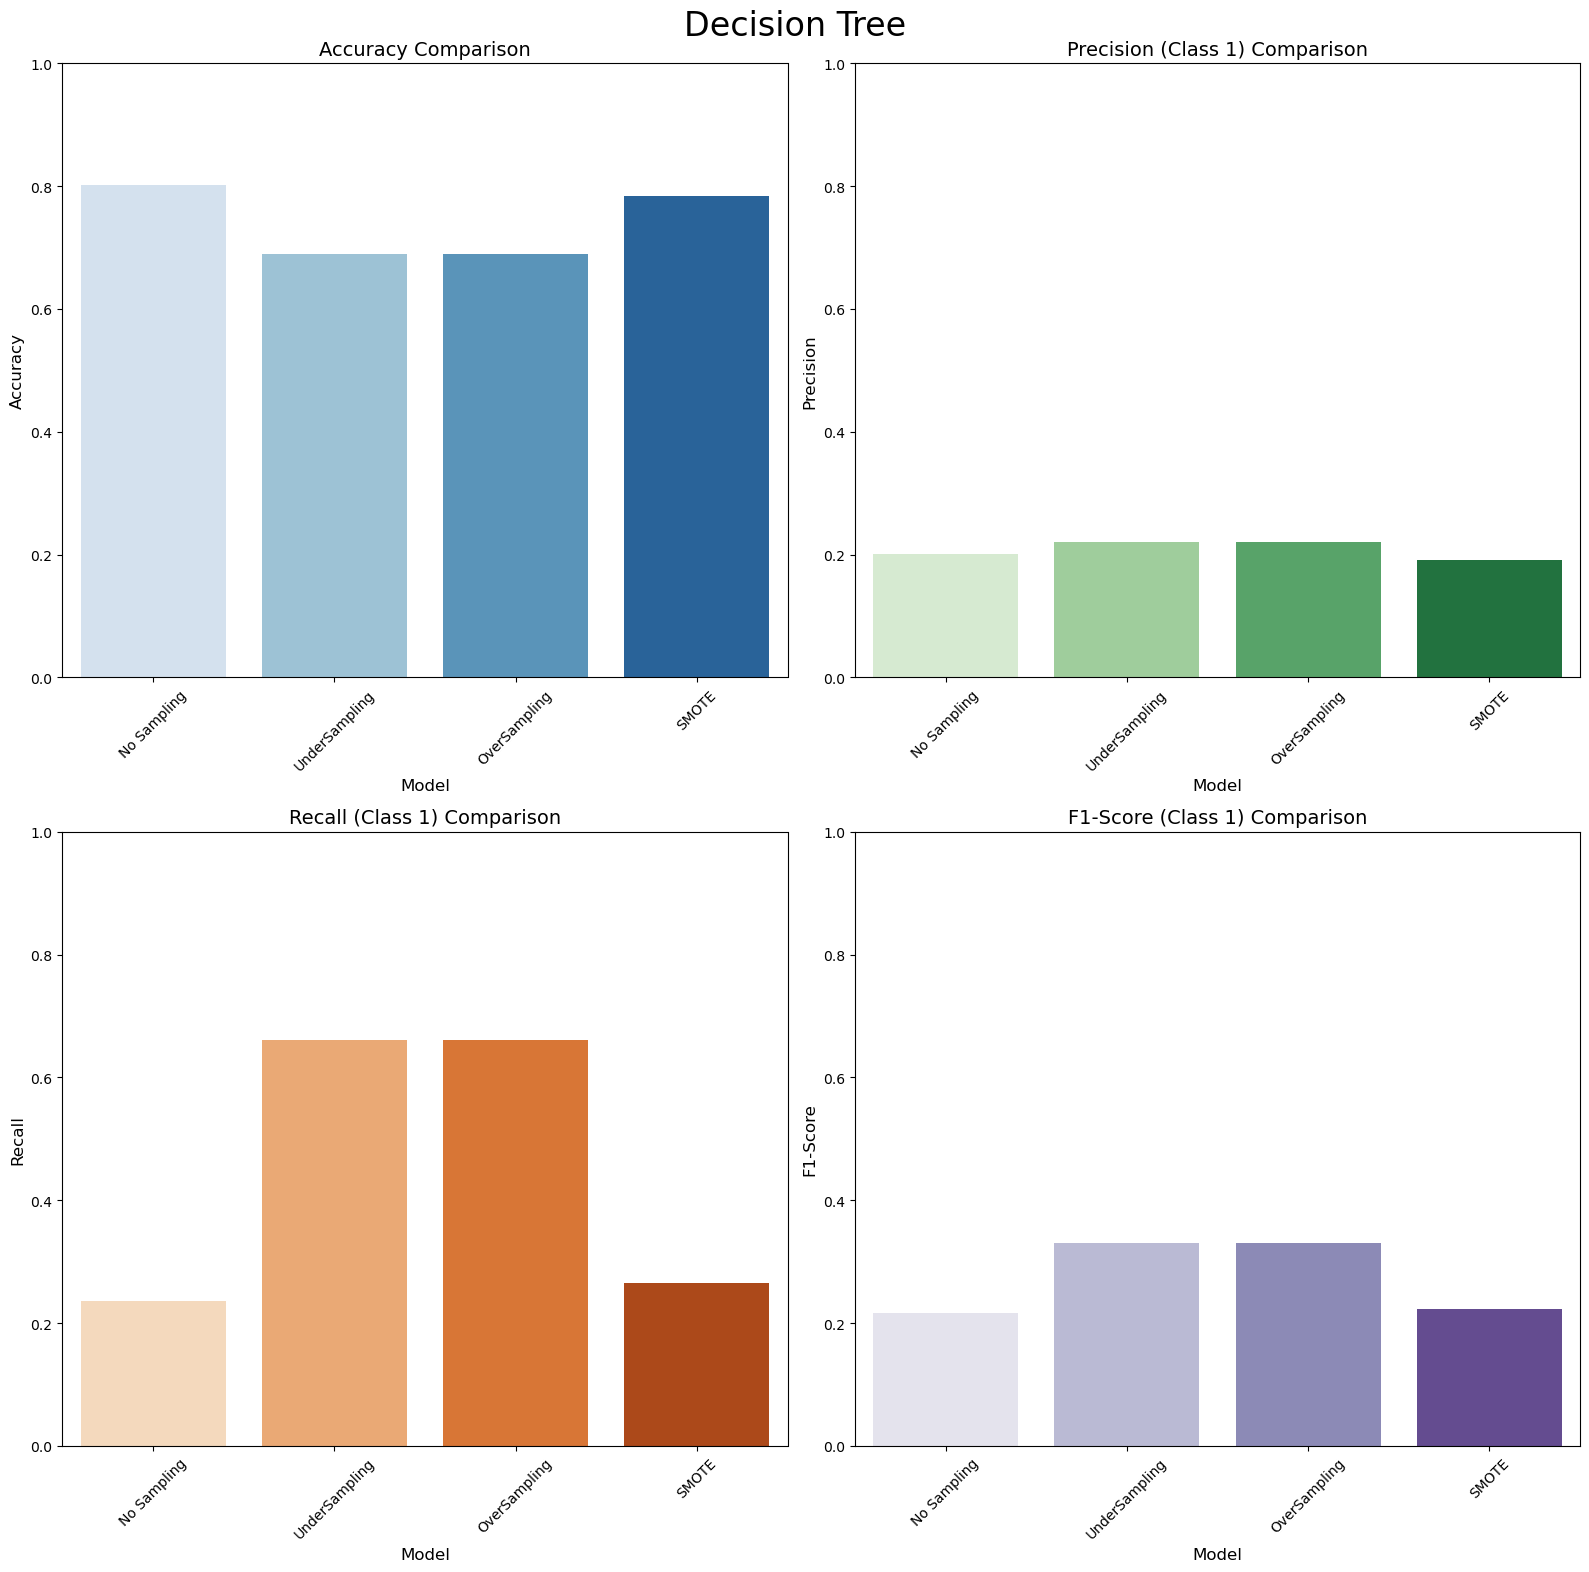

In [153]:
#Show Bar chart comparing metrics for Decision Tree with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, undersample_y_pred_dt),
        accuracy_score(y_test, oversample_y_pred_dt),
        accuracy_score(y_test, smote_y_pred_dt)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, undersample_y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, smote_y_pred_dt, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, undersample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, smote_y_pred_dt, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, undersample_y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, smote_y_pred_dt, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Decision Tree', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Visualizaton - Decision Tree - Takeaways**

With Decision Tree, the highest overall accuracy is with no sampling and the overall accuracy is just 2% lower with SMOTE.  However, the recall on class 1 with SMOTE is much lower than UnderSampling and OverSampling with the Decision Tree model.  Therefore, the Descision Tree with SMOTE resampling is not good for this use case.

Out of the different sampling methods, OverSampling and UnderSampling achieve the same results with a decrease in overall accuracy and precision on the 1 class but an increase in the recall and F1 score on the 1 class.

**KNN Model**

In [154]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)
    train_score = knn.score(X_train_encoded, y_train)
    test_score = knn.score(X_test_encoded, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")



k: 1, Train/Test Score: 1.000/0.814
k: 3, Train/Test Score: 0.909/0.861
k: 5, Train/Test Score: 0.896/0.876
k: 7, Train/Test Score: 0.892/0.880
k: 9, Train/Test Score: 0.890/0.882


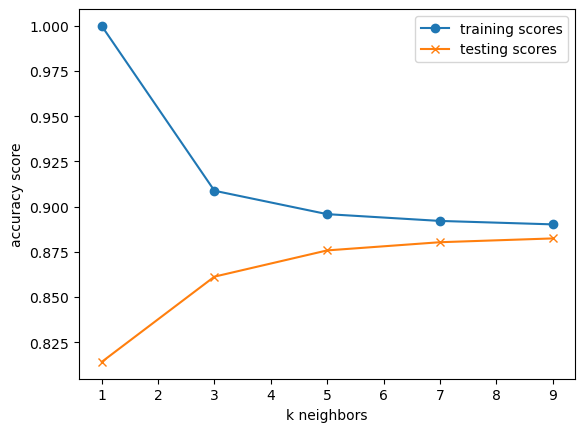

In [155]:
# Plot the results
plt.plot(range(1, 10, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 10, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [156]:
# Create the KNN model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train)

KNeighborsClassifier()

In [157]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_encoded, y_test)}")

Training Data Score: 0.8958540024019633
Testing Data Score: 0.8757930353870013


In [158]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn = knn_model.predict(X_test_encoded)

# Review the predictions
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [159]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn)

0.8757930353870013

,Metric,Count
0,True Negatives,55231
1,False Positives,1179
2,False Negatives,6750
3,True Positives,677


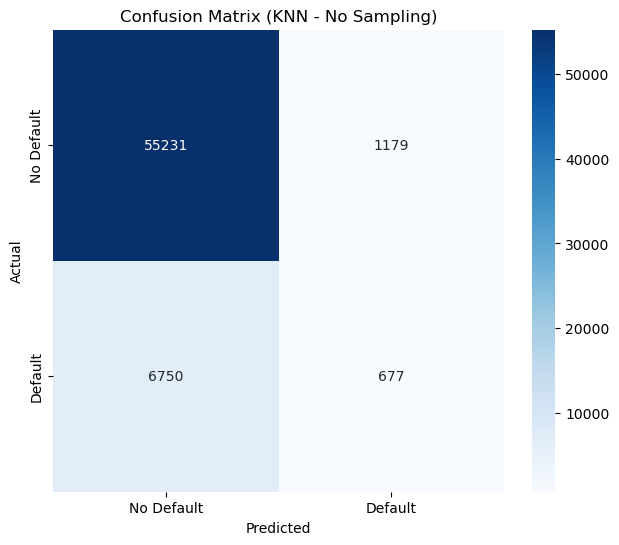

In [160]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn, "KNN - No Sampling")

In [161]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))

Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.36      0.09      0.15      7427

    accuracy                           0.88     63837
   macro avg       0.63      0.54      0.54     63837
weighted avg       0.83      0.88      0.84     63837



**Key Findings - KNN - No Sampling**

The accuracy score for the KNN model without any sampling is about 88%.  This seems very good at first glance.  However, the precision and recall for class 1 are 36% and 9% respectively.  The F1 score on the 1 class is only 15%, which is poor.

This model would be very bad for a bank due to the poor recall metric.  Recall is the key metric in this use case as a low recall would mean the bank giving out many loans which will default.

The dataset is imbalanced.  The majority of the DataSet is for "No Defaults" far outweighing the number of "Defaults".

Let's try and increase the recall by trying different techniques to handle the unbalanced dataset.

**UnderSampling**

In [162]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [163]:
# Fit the training data to the random undersampler model
X_undersampled_us, y_undersampled_us = rus.fit_resample(X_train_encoded, y_train)

In [164]:
# Count distinct values for the resampled target data
y_undersampled_us.value_counts()

Default
0    22226
1    22226
Name: count, dtype: int64

In [165]:
# Create the KNN model with 5 neighbors
knn_model_us = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_us.fit(X_undersampled_us, y_undersampled_us)

KNeighborsClassifier()

In [166]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model_us.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model_us.score(X_test_encoded, y_test)}")

Training Data Score: 0.6569056446138583
Testing Data Score: 0.6259379356799348


In [167]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn_us = knn_model_us.predict(X_test_encoded)

# Review the predictions
y_pred_knn_us

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [168]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn_us)

0.6259379356799348

,Metric,Count
0,True Negatives,35309
1,False Positives,21101
2,False Negatives,2778
3,True Positives,4649


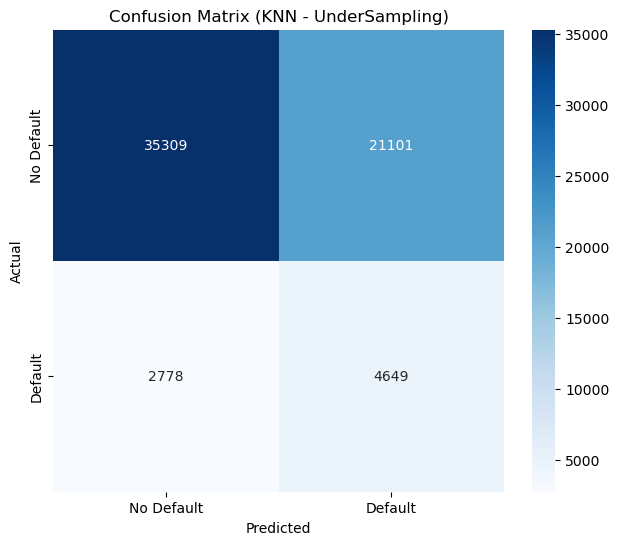

In [169]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn_us, "KNN - UnderSampling")

In [170]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))


Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.36      0.09      0.15      7427

    accuracy                           0.88     63837
   macro avg       0.63      0.54      0.54     63837
weighted avg       0.83      0.88      0.84     63837

---------
Classification Report - KNN - UnderSampling
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     56410
           1       0.18      0.63      0.28      7427

    accuracy                           0.63     63837
   macro avg       0.55      0.63      0.51     63837
weighted avg       0.84      0.63      0.69     63837



**Key Findings - KNN - UnderSampling**

The accuracy score for the KNN model using undersampling is about 63%.  The precision and recall for class 1 are 18% and 63% respectively.  The F1 score on the 1 class is 28%, which is poor.

The impact of UnderSampling compared to No Sampling is that the overall accuracy has gone down from 88% to 63%, the precision on the 1 class has gone down from 36% to 18% and the recall on the 1 class has increased from 9% to 63%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**OverSampling**

In [171]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

In [172]:
# Fit the training data to the `RandomOverSampler` model
X_oversampled_os, y_oversampled_os = ros.fit_resample(X_train_encoded, y_train)

In [173]:
# Count distinct values
y_oversampled_os.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [174]:
# Create the KNN model with 5 neighbors
knn_model_os = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_os.fit(X_oversampled_os, y_oversampled_os)

KNeighborsClassifier()

In [175]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model_os.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model_os.score(X_test_encoded, y_test)}")

Training Data Score: 0.8354968408960367
Testing Data Score: 0.7039804502091264


In [176]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn_os = knn_model_os.predict(X_test_encoded)

# Review the predictions
y_pred_knn_os

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [177]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn_os)

0.7039804502091264

,Metric,Count
0,True Negatives,41665
1,False Positives,14745
2,False Negatives,4152
3,True Positives,3275


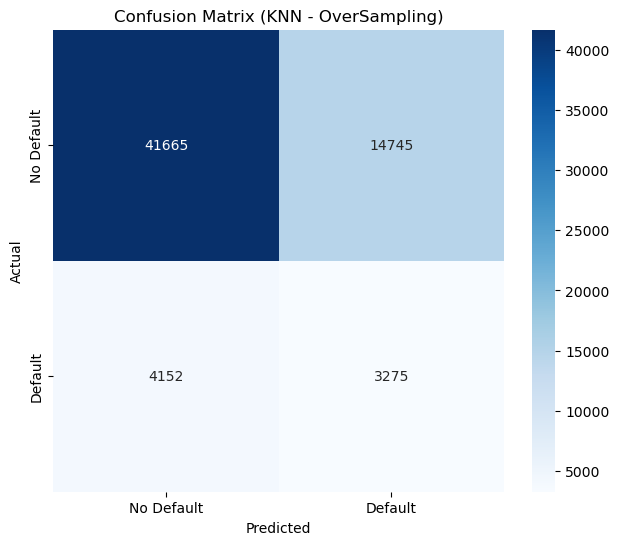

In [178]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn_os, "KNN - OverSampling")

In [179]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))
print("---------")
print(f"Classification Report - KNN - Oversampling")
print(classification_report(y_test, y_pred_knn_os))


Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.36      0.09      0.15      7427

    accuracy                           0.88     63837
   macro avg       0.63      0.54      0.54     63837
weighted avg       0.83      0.88      0.84     63837

---------
Classification Report - KNN - UnderSampling
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     56410
           1       0.18      0.63      0.28      7427

    accuracy                           0.63     63837
   macro avg       0.55      0.63      0.51     63837
weighted avg       0.84      0.63      0.69     63837

---------
Classification Report - KNN - Oversampling
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     56410
           1       0.18      0.44      0.26      7427

    accuracy                     

**Key Findings - KNN - OverSampling**

The accuracy score for knn model using oversampling is about 70%.  The precision and recall for class 1 are 18% and 44% respectively.  The F1 score on the 1 class is 26%, which is very poor.

The impact of OverSampling compared to No Sampling is that the overall accuracy has gone down from 88% to 70%, the precision on the 1 class has gone down from 36% to 18% and the recall on the 1 class has increased from 9% to 44%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**SMOTE**

In [180]:
# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

In [181]:
# Fit the training data to the smote_sampler model
X_resampled_rf, y_resampled_rf = smote_sampler.fit_resample(X_train_encoded, y_train)

In [182]:
y_resampled_rf.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [183]:
# Create the KNN model with 5 neighbors
knn_model_smote= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model_smote.fit(X_resampled_rf, y_resampled_rf)

KNeighborsClassifier()

In [184]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model_smote.score(X_train_encoded, y_train)}")
print(f"Testing Data Score: {knn_model_smote.score(X_test_encoded, y_test)}")

Training Data Score: 0.7820113832175866
Testing Data Score: 0.6458950138634334


In [185]:
# Make and save testing predictions with the saved random forest model using the test data
y_pred_knn_smote = knn_model_smote.predict(X_test_encoded)

# Review the predictions
y_pred_knn_smote

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [186]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_knn_smote)

0.6458950138634334

,Metric,Count
0,True Negatives,37194
1,False Positives,19216
2,False Negatives,3389
3,True Positives,4038


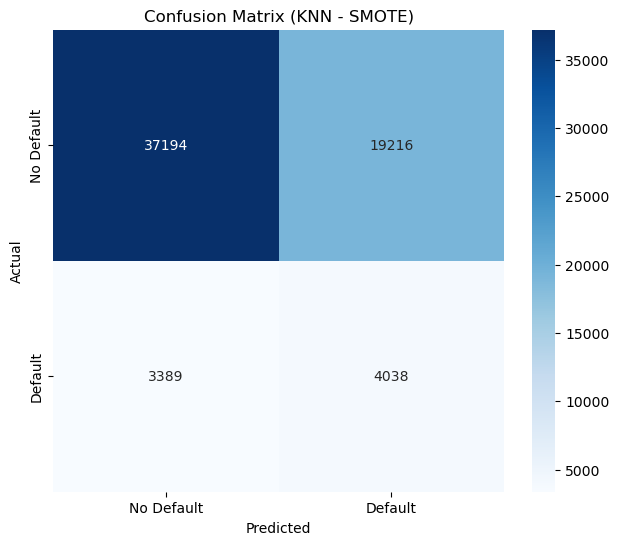

In [187]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_knn_smote, "KNN - SMOTE")

In [188]:
#Show Classification Reports
print(f"Classification Report - KNN - No Sampling")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))
print("---------")
print(f"Classification Report - KNN - Oversampling")
print(classification_report(y_test, y_pred_knn_os))
print("---------")
print(f"Classification Report - KNN - SMOTE")
print(classification_report(y_test, y_pred_knn_smote))



Classification Report - KNN - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     56410
           1       0.36      0.09      0.15      7427

    accuracy                           0.88     63837
   macro avg       0.63      0.54      0.54     63837
weighted avg       0.83      0.88      0.84     63837

---------
Classification Report - KNN - UnderSampling
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     56410
           1       0.18      0.63      0.28      7427

    accuracy                           0.63     63837
   macro avg       0.55      0.63      0.51     63837
weighted avg       0.84      0.63      0.69     63837

---------
Classification Report - KNN - Oversampling
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     56410
           1       0.18      0.44      0.26      7427

    accuracy                     

**Key Findings - KNN - SMOTE**

The accuracy score for the KNN model using SMOTE is about 65%.  The precision and recall for class 1 are 17% and 54% respectively.  The F1 score on the 1 class is 26%, which is poor.  

The impact of SMOTE compared to No Sampling is that the overall accuracy has gone down from 88% to 65% (a significant drop), the precision on the 1 class has gone down from 36% to 17% and the recall on the 1 class has increased from 9% to 54%.

Although the overall accuracy has gone down, the recall on the 1 class has improved, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.  

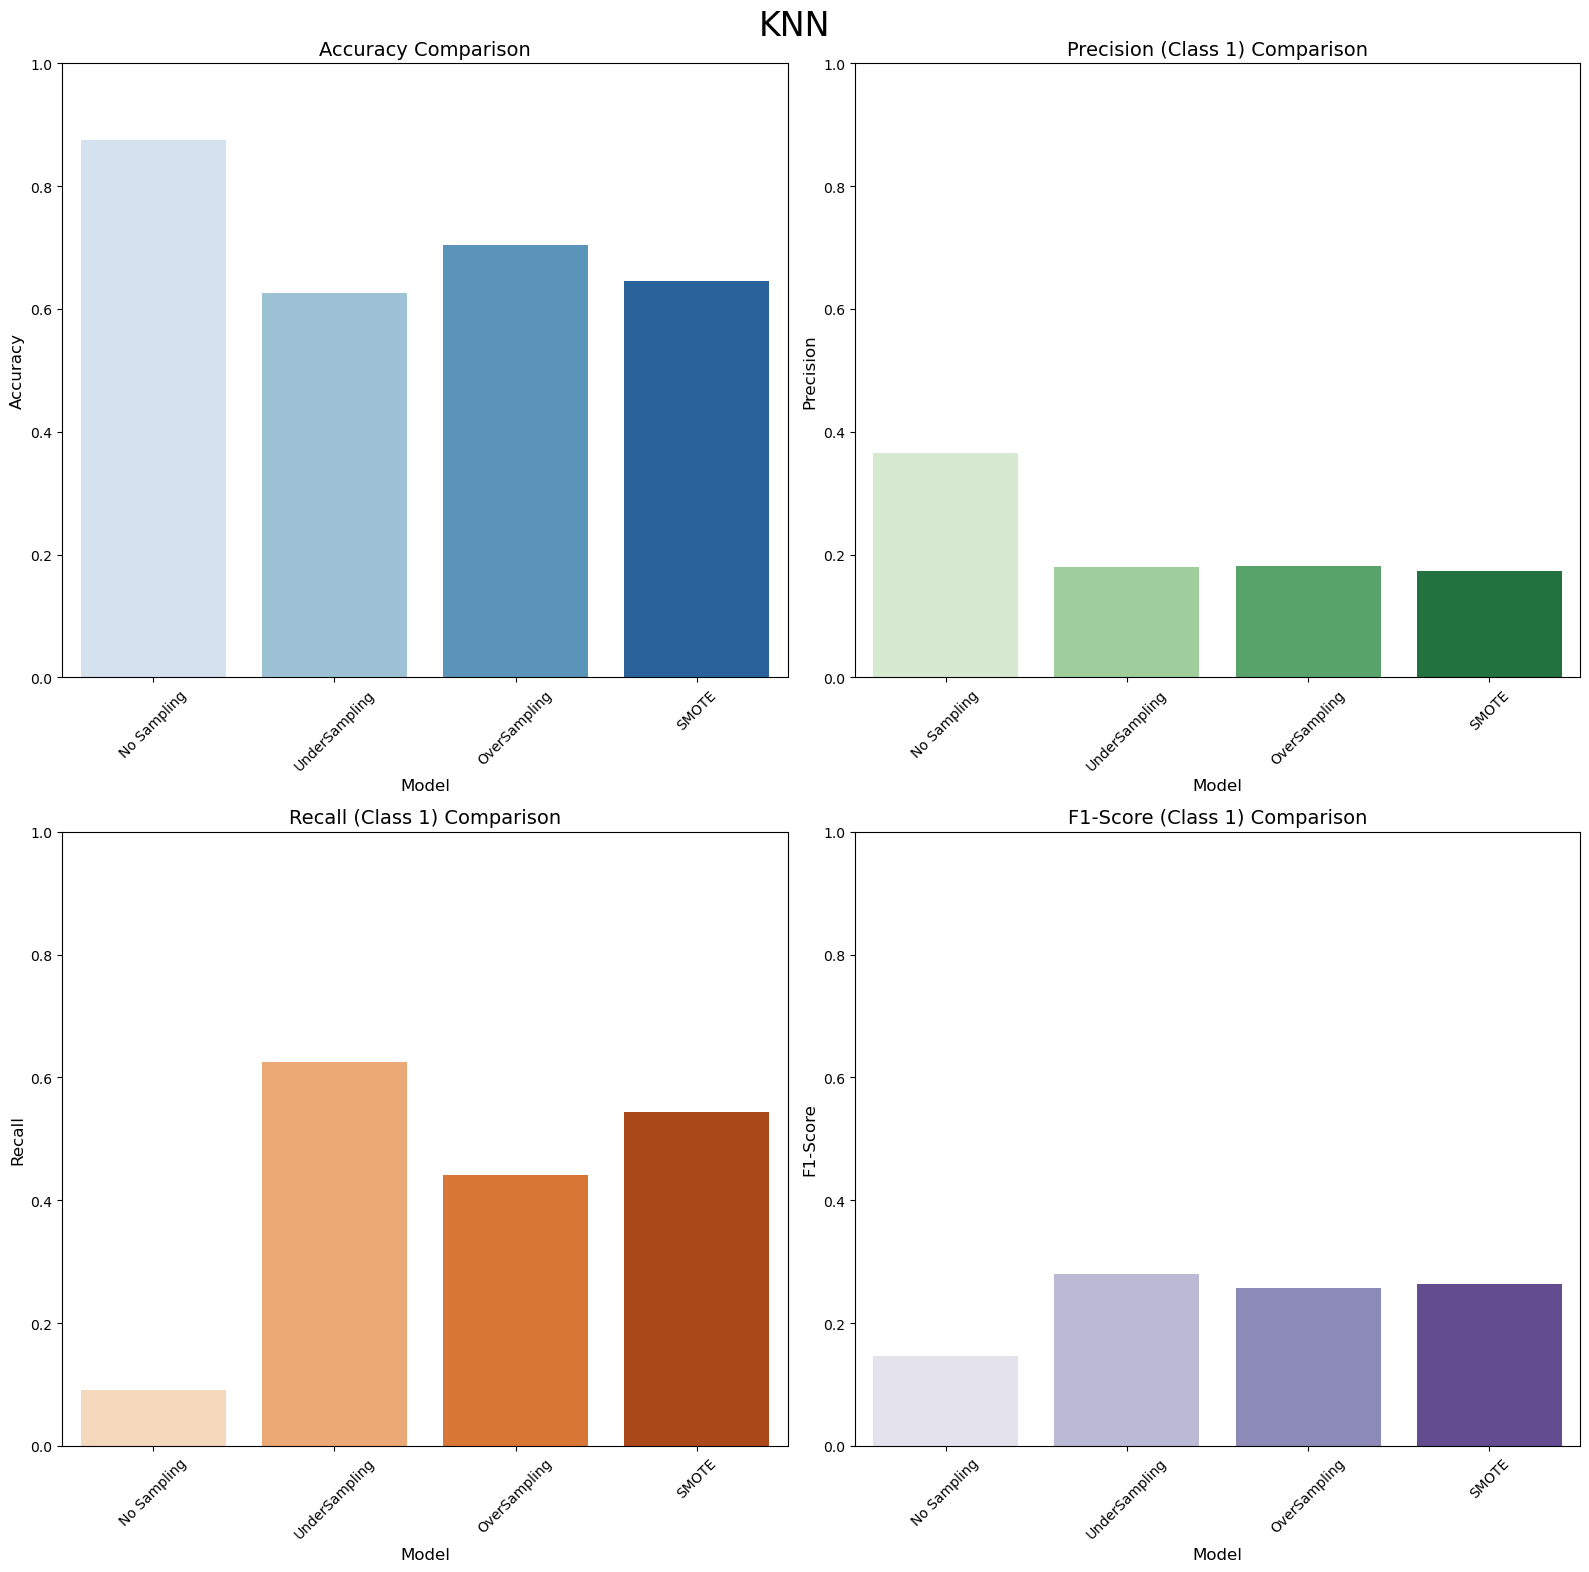

In [189]:
#Show Bar chart comparing metrics for KNN with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_knn_us),
        accuracy_score(y_test, y_pred_knn_os),
        accuracy_score(y_test, y_pred_knn_smote)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_os, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_smote, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_os, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_smote, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_os, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_smote, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('KNN', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Visualizaton - KNN - Takeaways**

With KNN, the highest overall accuracy is with no sampling.  

Out of the different sampling methods, UnderSampling achieves the best results with a decrease in overall accuracy and precision on the 1 class but an increase in the recall and F1 score on the 1 class.

# **XGBoost**

In [190]:
#XGBoost
xgb_model = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [191]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred_xgb = xgb_model.predict(X_test_encoded)

# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_xgb)

0.8853486222723499

,Metric,Count
0,True Negatives,55912
1,False Positives,498
2,False Negatives,6821
3,True Positives,606


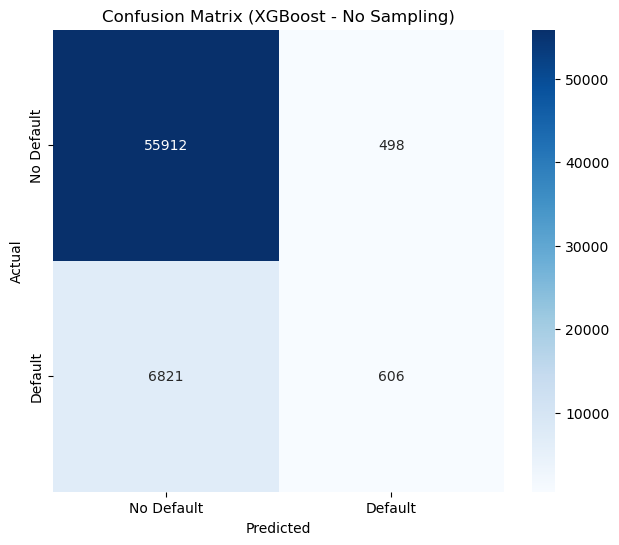

In [192]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_xgb, "XGBoost - No Sampling")

In [193]:
#Show classification report
print(f"Classification Report - XGBoost - No Sampling")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.55      0.08      0.14      7427

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837



**Key Findings - XGBoost - No Sampling**

The accuracy score for XGBoost without any sampling is about 89%.  This seems impressive at first glance.  However, the precision and recall for class 1 are 55% and 8% respectively.  The  F1 score on the 1 class is only 14%, which is very poor.

This model would be very bad for a bank due to the poor recall metric.  Recall is the key metric in this use case as it as a low recall would mean the bank giving out many loans which will default.

The dataset is imbalanced.  The majority of the DataSet is for "No Defaults" far outweighing the number of "Defaults".

Let's try and increase the recall by trying different techniques to handle the unbalanced dataset.

**UnderSampling**

In [194]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [195]:
# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train_encoded, y_train)

In [196]:
# Count distinct values for the resampled target data
y_undersampled.value_counts()

Default
0    22226
1    22226
Name: count, dtype: int64

In [197]:
#XGBoost
xgb_model_undersampling = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model_undersampling.fit(X_undersampled, y_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [198]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred_xgb_us = xgb_model_undersampling.predict(X_test_encoded)

# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_xgb_us)

0.676081269483215

,Metric,Count
0,True Negatives,38165
1,False Positives,18245
2,False Negatives,2433
3,True Positives,4994


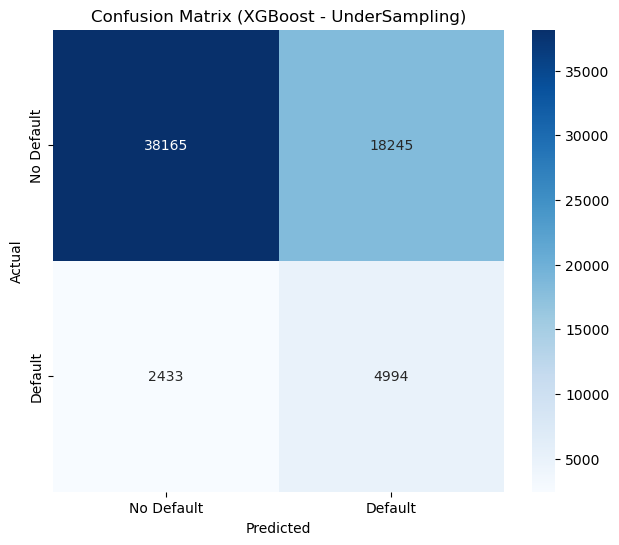

In [199]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_xgb_us, "XGBoost - UnderSampling")

In [200]:
#Show classification report
print(f"Classification Report - XGBoost - No Sampling")
print(classification_report(y_test, y_pred_xgb))
print("---------")
print(f"Classification Report - XGBoost - UnderSampling")
print(classification_report(y_test, y_pred_xgb_us))

Classification Report - XGBoost - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.55      0.08      0.14      7427

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837

---------
Classification Report - XGBoost - UnderSampling
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     56410
           1       0.21      0.67      0.33      7427

    accuracy                           0.68     63837
   macro avg       0.58      0.67      0.56     63837
weighted avg       0.86      0.68      0.73     63837



**Key Findings - XGBoost - UnderSampling**

The accuracy score for the XGBoost model using undersampling is about 68%.  The precision and recall for class 1 are 21% and 67% respectively.  The F1 score on the 1 class is 33%, which is poor.

The impact of UnderSampling compared to No Sampling is that the overall accuracy has gone down from 89% to 68%, the precision on the 1 class has gone down from 55% to 21% and the recall on the 1 class has increased from 8% to 67%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**OverSampling**

In [201]:
ros = RandomOverSampler(random_state=1)

# Fit the training data to the `RandomOverSampler` model
X_oversampled, y_oversampled = ros.fit_resample(X_train_encoded, y_train)

# Count distinct values
y_oversampled.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [202]:
#XGBoost
xgb_model_oversampling = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model_oversampling.fit(X_oversampled, y_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [203]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred_xgb_os = xgb_model_oversampling.predict(X_test_encoded)

# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_xgb_os)

0.7213371555680874

,Metric,Count
0,True Negatives,41500
1,False Positives,14910
2,False Negatives,2879
3,True Positives,4548


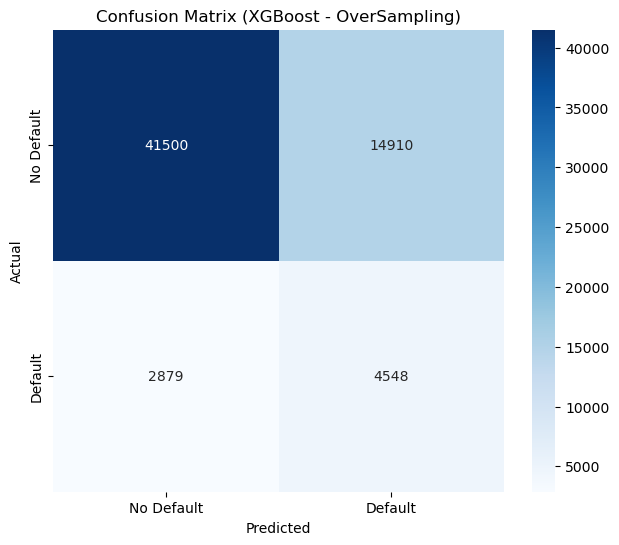

In [204]:
#classifcation matrix
display_confusion_matrix(y_test, y_pred_xgb_os, "XGBoost - OverSampling")

In [226]:
#Show classification report
print(f"Classification Report - XGBoost - No Sampling")
print(classification_report(y_test, y_pred_xgb))
print("---------")
print(f"Classification Report - XGBoost - UnderSampling")
print(classification_report(y_test, y_pred_xgb_us))
print("---------")
print(f"Classification Report - XGBoost - OverSampling")
print(classification_report(y_test, y_pred_xgb_os))


Classification Report - XGBoost - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.55      0.08      0.14      7427

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837

---------
Classification Report - XGBoost - UnderSampling
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     56410
           1       0.21      0.67      0.33      7427

    accuracy                           0.68     63837
   macro avg       0.58      0.67      0.56     63837
weighted avg       0.86      0.68      0.73     63837

---------
Classification Report - XGBoost - OverSampling
              precision    recall  f1-score   support

           0       0.94      0.74      0.82     56410
           1       0.23      0.61      0.34      7427

    accuracy         

**Key Findings - XGBoost - OverSampling**

The accuracy score for XGBoost using oversampling is about 72%.  The precision and recall for class 1 are 23% and 61% respectively.  The F1 score on the 1 class is 34%, which is not good.

The impact of OverSampling compared to No Sampling is that the overall accuracy has gone down from 89% to 72%, the precision on the 1 class has gone down from 55% to 23% and the recall on the 1 class has increased from 8% to 61%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

**SMOTE**

In [206]:
# Instantiate the SMOTE instance
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')

# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_encoded, y_train)

# Count distinct values for the resampled target data
y_resampled.value_counts()

Default
0    169284
1    169284
Name: count, dtype: int64

In [207]:
#XGBoost
xgb_model_smote = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model_smote.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [208]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred_xgb_smote = xgb_model_smote.predict(X_test_encoded)

# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_xgb_smote)

0.8853329573758165

,Metric,Count
0,True Negatives,55880
1,False Positives,530
2,False Negatives,6790
3,True Positives,637


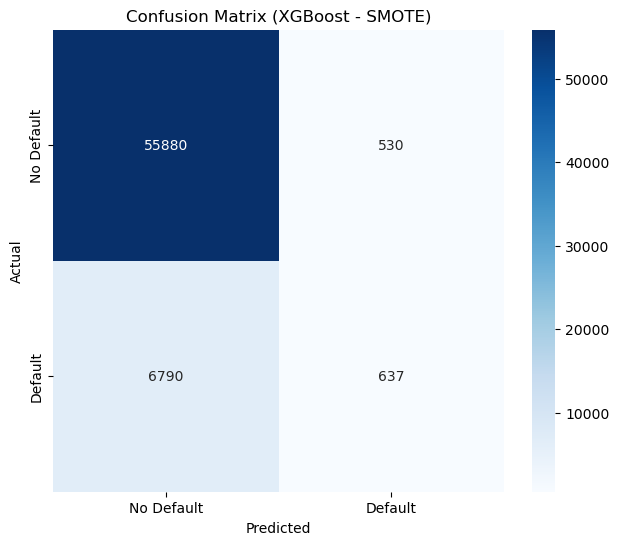

In [209]:
#confusion matrix
display_confusion_matrix(y_test, y_pred_xgb_smote, "XGBoost - SMOTE")

In [227]:
#Show classification report
print(f"Classification Report - XGBoost - No Sampling")
print(classification_report(y_test, y_pred_xgb))
print("---------")
print(f"Classification Report - XGBoost - UnderSampling")
print(classification_report(y_test, y_pred_xgb_us))
print("---------")
print(f"Classification Report - XGBoost - OverSampling")
print(classification_report(y_test, y_pred_xgb_os))
print("---------")
print(f"Classification Report - XGBoost - SMOTE")
print(classification_report(y_test, y_pred_xgb_smote))



Classification Report - XGBoost - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.55      0.08      0.14      7427

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837

---------
Classification Report - XGBoost - UnderSampling
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     56410
           1       0.21      0.67      0.33      7427

    accuracy                           0.68     63837
   macro avg       0.58      0.67      0.56     63837
weighted avg       0.86      0.68      0.73     63837

---------
Classification Report - XGBoost - OverSampling
              precision    recall  f1-score   support

           0       0.94      0.74      0.82     56410
           1       0.23      0.61      0.34      7427

    accuracy         

**Key Findings - XGBoost - SMOTE**

The accuracy score for the XGBoost model using SMOTE is about 89%.  The precision and recall for class 1 are 55% and 9% respectively.  The F1 score on the 1 class is 15%, which is very poor.  

The impact of SMOTE compared to No Sampling is that the overall accuracy has remained at 89%, the precision on the 1 class has stayed at 55% and the recall on the 1 class has increased slightly from 8% to 9%.

Although the overall acuracy is still high, the recall on the 1 class is too low, thus this model is not well suited to the Loan Default use case given that the recall is more significant than the precision.  

**SMOTEENN**

In [211]:
# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_encoded, y_train)

y_resampled.value_counts()

Default
1    168736
0     91546
Name: count, dtype: int64

In [212]:
#XGBoost
xgb_model_smoteenn = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model_smoteenn.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [213]:
# Make and save testing predictions with the saved logistic regression model using the test data
y_pred_xgb_smoteenn = xgb_model_smoteenn.predict(X_test_encoded)

# Display the accuracy score for the test dataset.
accuracy_score(y_test, y_pred_xgb_smoteenn)

0.8136817206322352

,Metric,Count
0,True Negatives,48609
1,False Positives,7801
2,False Negatives,4093
3,True Positives,3334


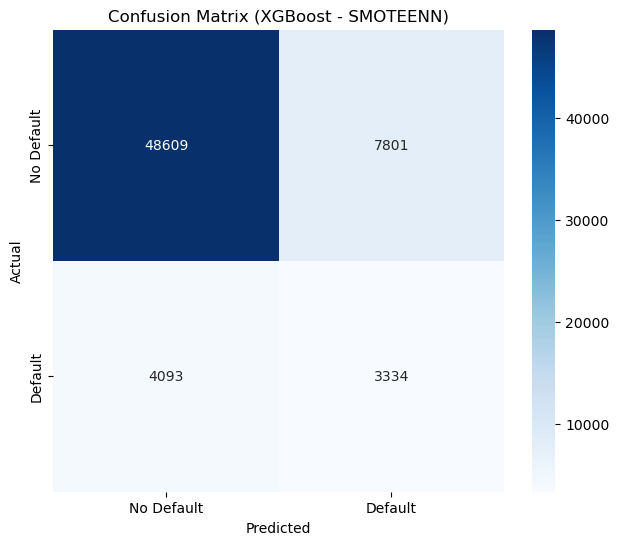

In [214]:
#confusion matrix
display_confusion_matrix(y_test, y_pred_xgb_smoteenn, "XGBoost - SMOTEENN")

In [215]:
#Show classification report
print(f"Classification Report - XGBoost - No Sampling")
print(classification_report(y_test, y_pred_xgb))
print("---------")
print(f"Classification Report - XGBoost - UnderSampling")
print(classification_report(y_test, y_pred_xgb_us))
print("---------")
print(f"Classification Report - XGBoost - OverSampling")
print(classification_report(y_test, y_pred_xgb_os))
print("---------")
print(f"Classification Report - XGBoost - SMOTE")
print(classification_report(y_test, y_pred_xgb_smote))
print("---------")
print(f"Classification Report - XGBoost - SMOTEENN")
print(classification_report(y_test, y_pred_xgb_smoteenn))



Classification Report - XGBoost - No Sampling
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.55      0.08      0.14      7427

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837

---------
Classification Report - XGBoost - UnderSampling
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     56410
           1       0.21      0.67      0.33      7427

    accuracy                           0.68     63837
   macro avg       0.58      0.67      0.56     63837
weighted avg       0.86      0.68      0.73     63837

---------
Classification Report - XGBoost - OverSampling
              precision    recall  f1-score   support

           0       0.94      0.74      0.82     56410
           1       0.23      0.61      0.34      7427

    accuracy         

**Key Findings - XGBoost - SMOTEENN**

The accuracy score for XGBoost using SMOTEENN is about 81%.  The precision and recall for class 1 are 30% and 45% respectively.  The F1 score on the 1 class is 36%, which is not good.  

The impact of SMOTEENN compared to No Sampling is that the overall accuracy has gone down from 89% to 81%, the precision for the 1 class has gone down from 55% to 30% and the recall on the 1 class has increased from 8% to 45%.

Although the overall accuracy has gone down, the recall on the 1 class has improved significantly, thus this model may be better for the Loan Default use case given that the recall is more significant than the precision.

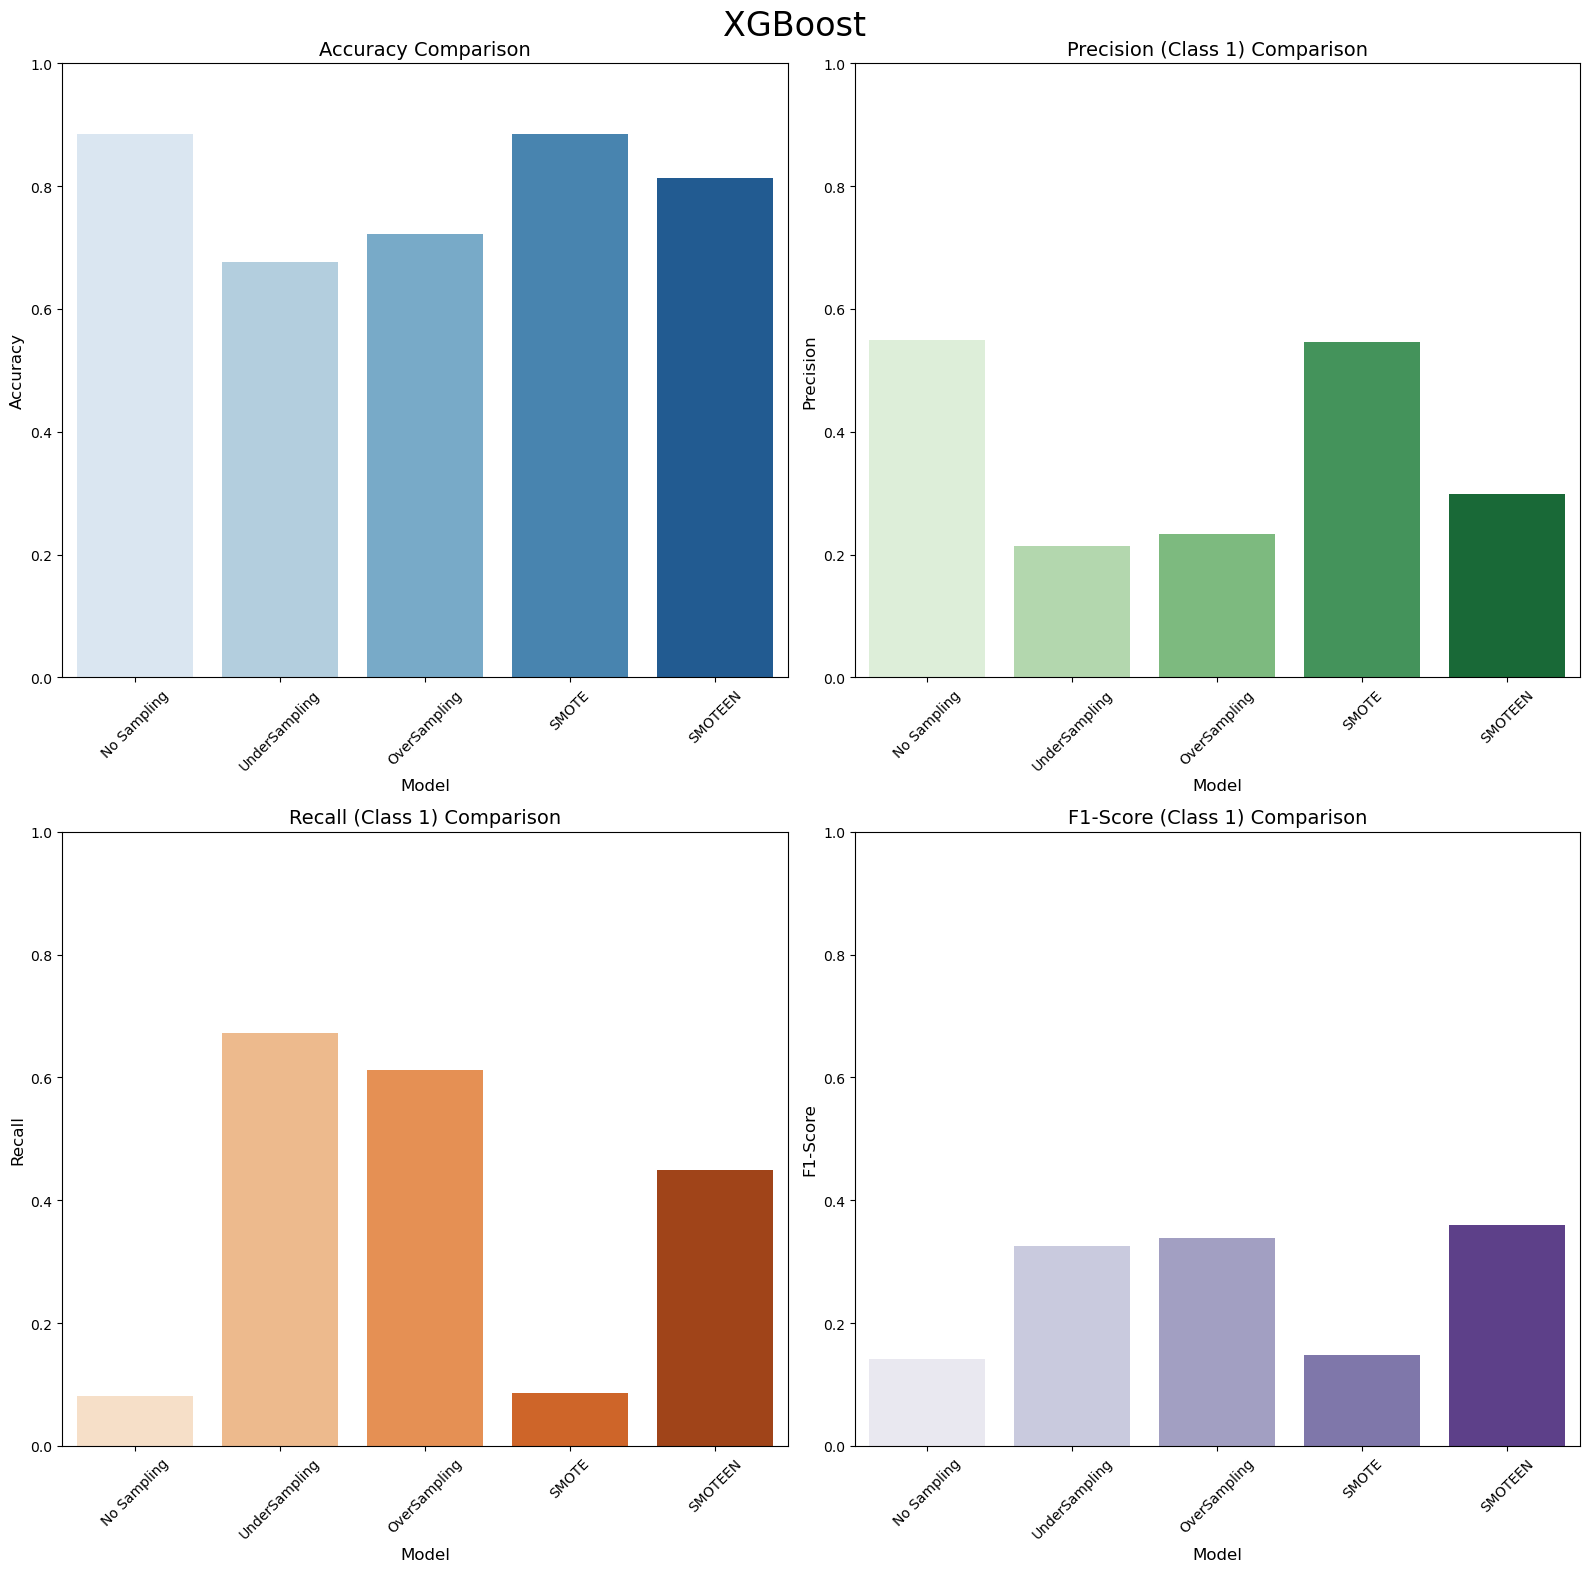

In [216]:
#Show Bar chart comparing metrics for XGBoost with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["No Sampling", "UnderSampling", "OverSampling", "SMOTE", "SMOTEEN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_xgb_us),
        accuracy_score(y_test, y_pred_xgb_os),
        accuracy_score(y_test, y_pred_xgb_smote),
        accuracy_score(y_test, y_pred_xgb_smoteenn)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb_us, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb_os, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb_smote, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb_smoteenn, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb_us, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb_os, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb_smote, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb_smoteenn, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb_us, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb_os, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb_smote, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb_smoteenn, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('XGBoost', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Visualizaton - XGBoost - Takeaways**

With the XGBoost classifier, the highest overall accuracy is with no sampling and SMOTE at 89%.  However, with SMOTE the recall on the 1 class is very low at only 9%, which is just a 1% improvement over the recall on the 1 class with no sampling which is 8%.  Despite the impressive overall accuracy of XGBoost with SMOTE, it has a very low recall thus makking it unsuitable for our loan default use case.

Out of the different sampling methods, UnderSampling achieves the best results with a decrease in overall accuracy and precision on the 1 class but an increase in the recall and F1 score on the 1 class.

# **Compare models with no sampling**

In [217]:
#Show classification reports

print(f"Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("---------")
print(f"Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("---------")
print(f"Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))
print("---------")
print(f"Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56410
           1       0.63      0.07      0.13      7427

    accuracy                           0.89     63837
   macro avg       0.76      0.53      0.53     63837
weighted avg       0.86      0.89      0.85     63837

---------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.62      0.05      0.09      7427

    accuracy                           0.89     63837
   macro avg       0.75      0.52      0.51     63837
weighted avg       0.86      0.89      0.84     63837

---------
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.24      0.22      7427

    accuracy                           0.8

**Note: Without any resampling, the best model is DecisionTree**


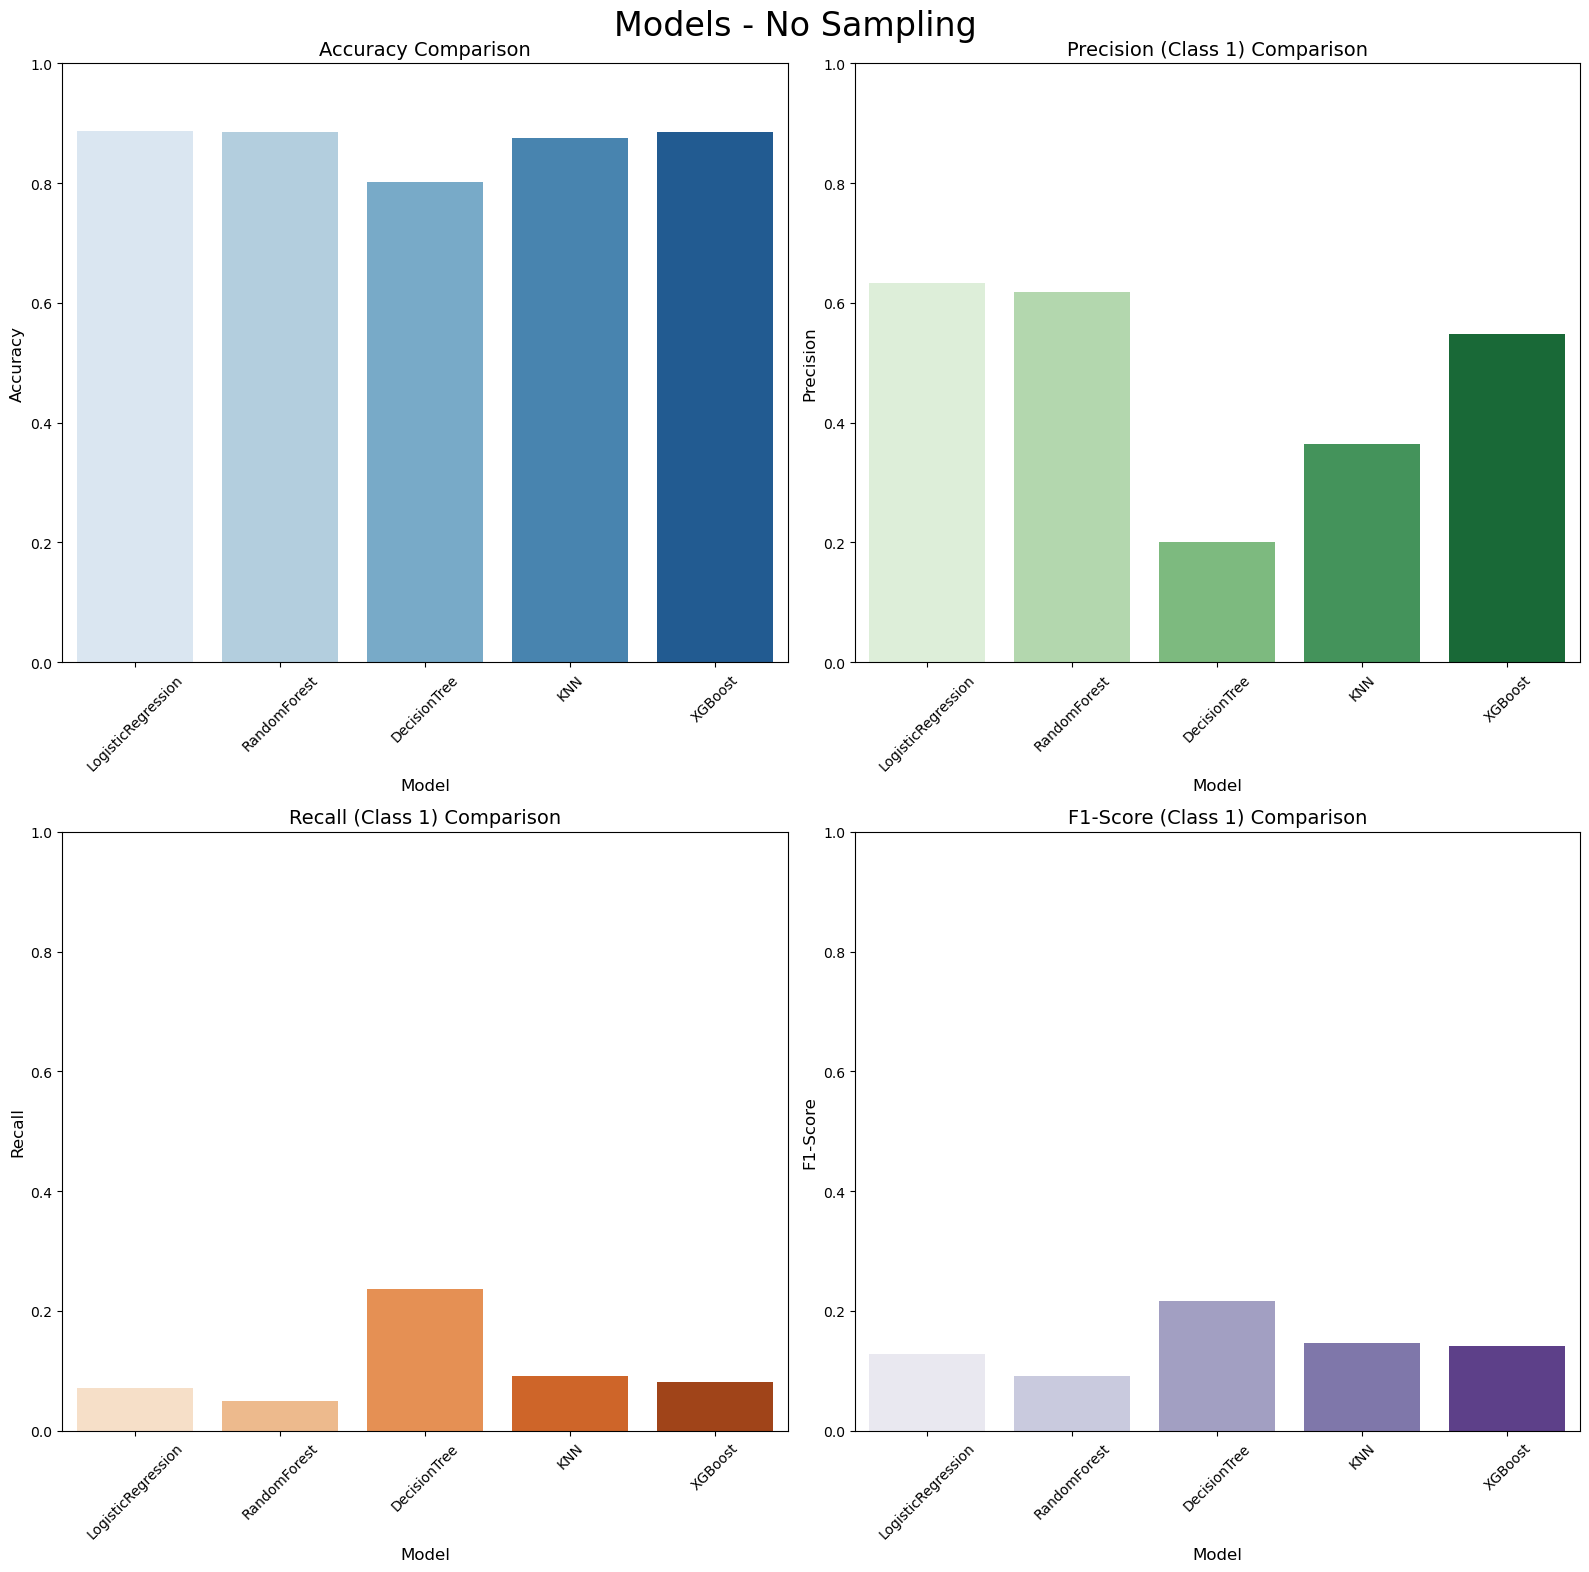

In [218]:
#Show Bar chart comparing metrics for Models with no samplig with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["LogisticRegression", "RandomForest", "DecisionTree", "KNN", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Models - No Sampling', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Findings - which model performed best with no samping?**

When looking at each of the models without any sampling to overcome the imbalanced dataset,  the Decision Tree performs best on the 1 class with a precision of 20%, a recall of 24% and F1 score of 22%.  The overall accuracy of the Decision Tree is 80%.  

The overall accuracy of the Decfision Tree model is not the highest of the models. Logistic Regression, RandomForest and XGBoost have the highest accuracy at 89%, although as previously explained, this does not mean that Logistic Regression, RandomForest or XGBoost would be better for this use case as the recall is the most important metric for a bank to predict defaults.

# **Compare best iteration of each model type**

In [219]:
print("---------Best Results------------")
print(f"Classification Report - Logistic Regression and UnderSampling")
print(classification_report(y_test, y_pred_undersampled))
print("---------")
print(f"Classification Report - RandomForestClassifier and Oversampling")
print(classification_report(y_test, oversample_y_pred_rf ))
print("---------")
print(f"Classification Report - DecisionTree and Oversampling")
print(classification_report(y_test, oversample_y_pred_dt))
print("---------")
print(f"Classification Report - KNN - UnderSampling")
print(classification_report(y_test, y_pred_knn_us))
print("---------")
print(f"Classification Report - XGBoost - UnderSampling")
print(classification_report(y_test, y_pred_xgb_us))

---------Best Results------------
Classification Report - Logistic Regression and UnderSampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.23      0.69      0.34      7427

    accuracy                           0.69     63837
   macro avg       0.59      0.69      0.57     63837
weighted avg       0.86      0.69      0.75     63837

---------
Classification Report - RandomForestClassifier and Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
           1       0.22      0.66      0.33      7427

    accuracy                           0.69     63837
   macro avg       0.58      0.68      0.56     63837
weighted avg       0.86      0.69      0.74     63837

---------
Classification Report - DecisionTree and Oversampling
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     56410
   

**The best model and sampling approach**

The best results were achieved with a combination of the **Logistic Regression model and UnderSampling**.  It achieves the highest recall on the 1 class with 69%.  This metric is key for banks to avoid making loans that will default.  The overall accuracy of the Logistic Regression with UnderSampling is also 69%.

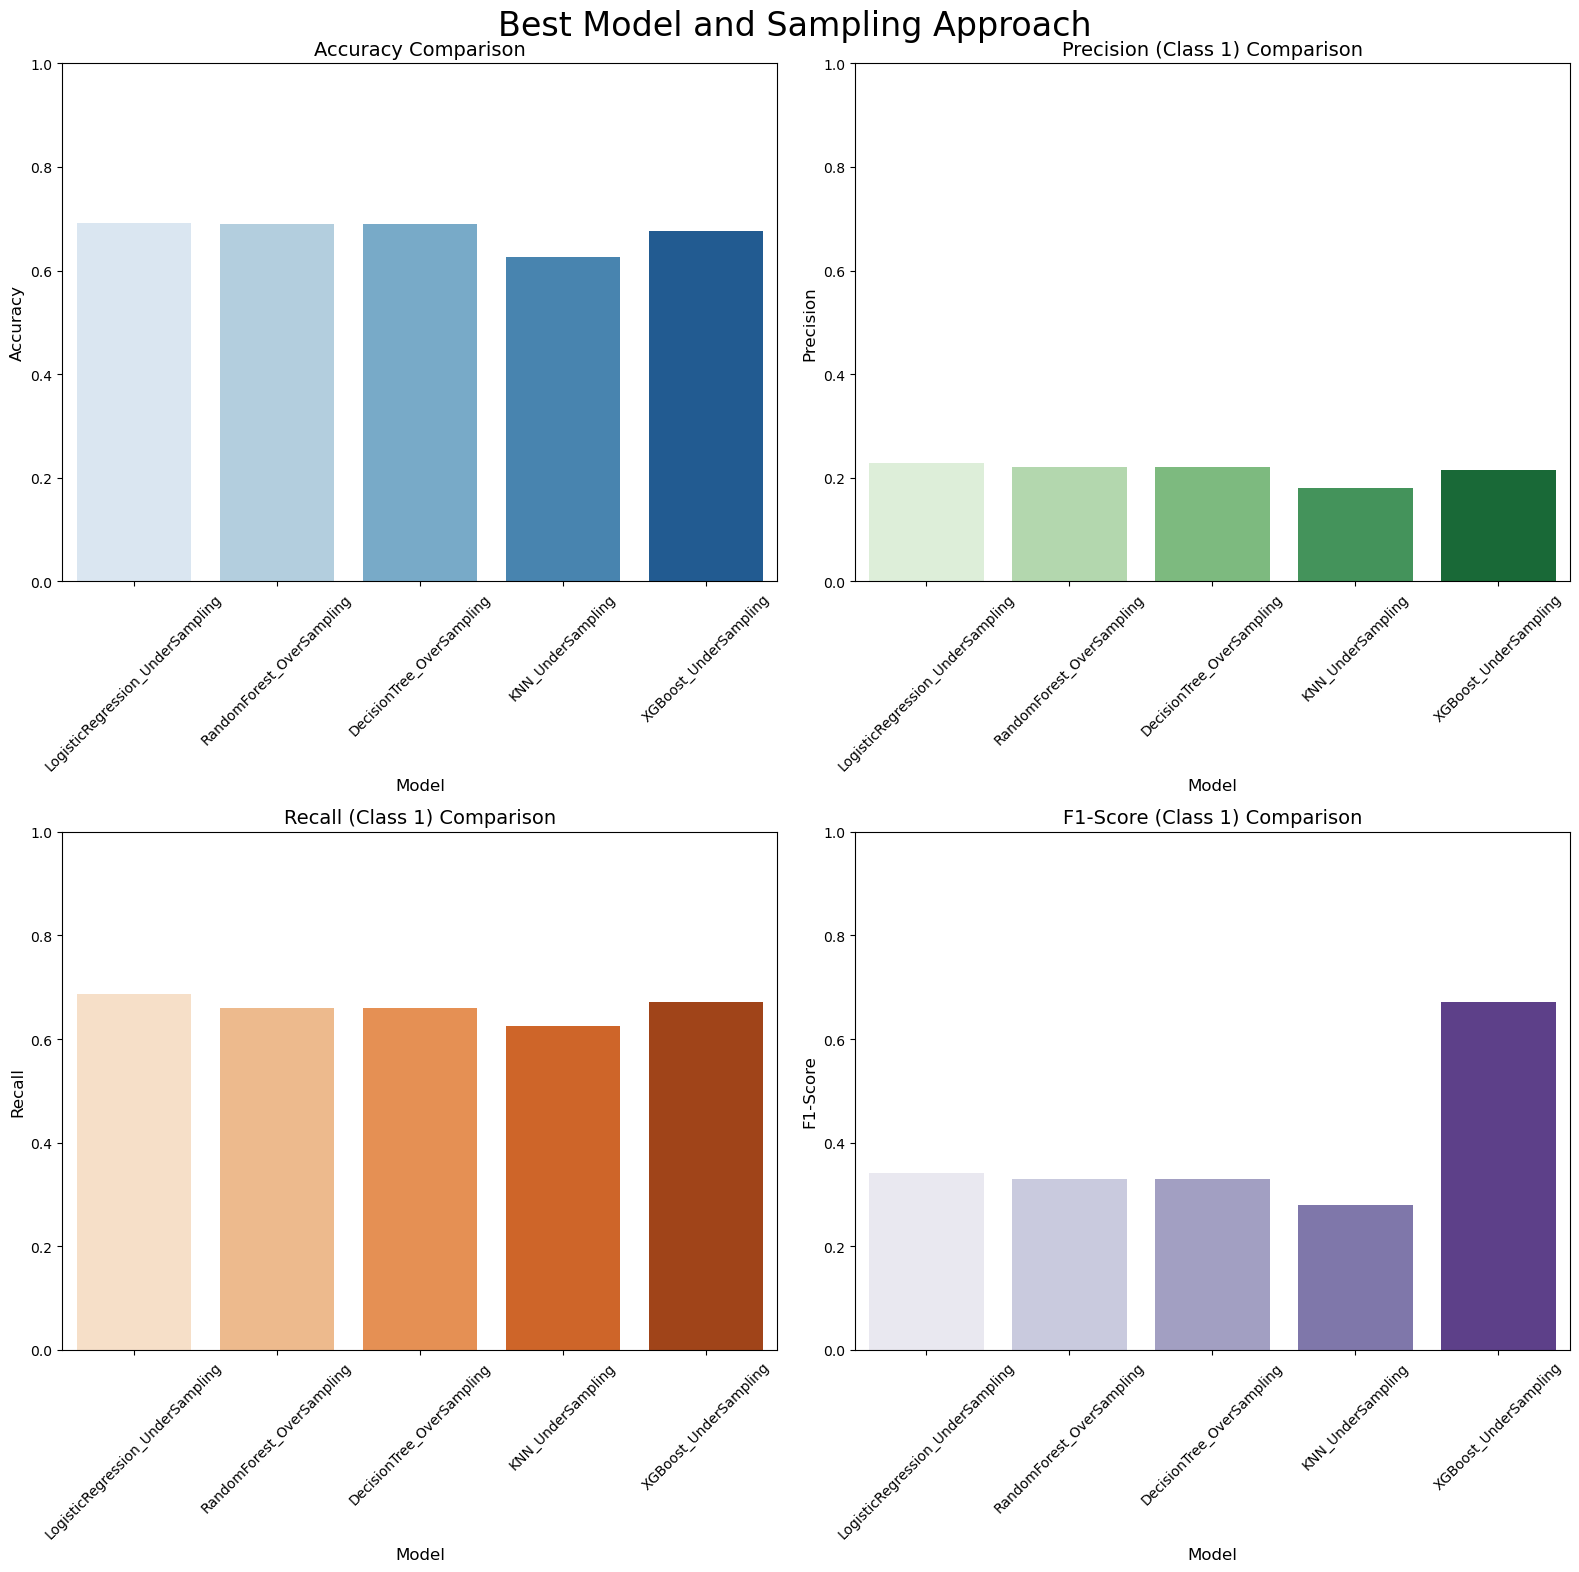

In [220]:
#Show Bar chart comparing metrics for Models with no samplig with different sampling techniques

# Reinitialize the results dictionary
results = {
    "Model": ["LogisticRegression_UnderSampling", "RandomForest_OverSampling", "DecisionTree_OverSampling", "KNN_UnderSampling", "XGBoost_UnderSampling"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_undersampled),
        accuracy_score(y_test, oversample_y_pred_rf),
        accuracy_score(y_test, oversample_y_pred_dt),
        accuracy_score(y_test, y_pred_knn_us),
        accuracy_score(y_test, y_pred_xgb_us)
    ],
    "Precision (Class 1)": [
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_xgb_us, output_dict=True)['1']['precision']
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_xgb_us, output_dict=True)['1']['recall']
    ],
    "F1-Score (Class 1)": [
        classification_report(y_test, y_pred_undersampled, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, oversample_y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn_us, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_xgb_us, output_dict=True)['1']['recall']
    ]
}

# Convert to DataFrame and visualize
results_df = pd.DataFrame(results)

# Visualize results
#plt.figure(figsize=(16, 16))
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # Create subplots with fig and axes
fig.suptitle('Best Model and Sampling Approach', fontsize=24)  # Add overall title


# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Model", dodge=False, palette="Blues", legend=False)
plt.title("Accuracy Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Precision comparison
plt.subplot(2, 2, 2)
sns.barplot(data=results_df, x="Model", y="Precision (Class 1)", hue="Model", dodge=False, palette="Greens", legend=False)
plt.title("Precision (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Recall comparison
plt.subplot(2, 2, 3)
sns.barplot(data=results_df, x="Model", y="Recall (Class 1)", hue="Model", dodge=False, palette="Oranges", legend=False)
plt.title("Recall (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# F1-Score comparison
plt.subplot(2, 2, 4)
sns.barplot(data=results_df, x="Model", y="F1-Score (Class 1)", hue="Model", dodge=False, palette="Purples", legend=False)
plt.title("F1-Score (Class 1) Comparison", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**The best model and sampling approach**

These charts compare the best sampling approach from each of the models and show how the accuracy, precision, recall and F1 score compare.

With both the Random Forest and Decision Tree models, the OverSampling and OverSampling techniques yield identical results so these two sampling techniques are an exact tie for these two models.

To reiterate, the best results were achieved with a combination of the **Logistic Regression model and UnderSampling**.  It achieves the highest recall on the 1 class with 69%.  This metric is key for banks to avoid making loans that will default.  The overall accuracy of the Logistic Regression with OverSampling is also 69%.